In [355]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 

import folium
from folium.plugins import HeatMap
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
import matplotlib.pyplot as plt
import numpy as np

In [283]:
data = pd.read_csv("./bikeshare/bikeshare_preprocessing_with_rules.csv").drop("Unnamed: 0", axis=1)
data

time  hour  station_id  bikes_available  docks_available  \
0        2013/08/29    13         2.0         2.698113        24.301887   
1        2013/08/29    14         2.0         2.000000        25.000000   
2        2013/08/29    15         2.0         2.000000        25.000000   
3        2013/08/29    16         2.0         2.000000        25.000000   
4        2013/08/29    17         2.0         2.907407        24.092593   
...             ...   ...         ...              ...              ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000   
1204760  2015/08/31    20        84.0         8.000000         7.000000   
1204761  2015/08/31    21        84.0         8.000000         7.000000   
1204762  2015/08/31    22        84.0         8.000000         7.000000   
1204763  2015/08/31    23        84.0         8.000000         7.000000   

         city_zip  month  dayofweek  dock_count  max_temperature_f  ...  \
0         95113.0    8.0        3.0          27               81.0  ...   
1         95113.0    8.0        3.0          27               81.0  ...   
2         95113.0    8.0        3.0          27               81.0  ...   
3         95113.0    8.0        3.0          27               81.0  ...   
4         95113.0    8.0        3.0          27               81.0  ...   
...           ...    ...        ...         ...                ...  ...   
1204759   95113.0    8.0        0.0          15               85.0  ...   
1204760   95113.0    8.0        0.0          15               85.0  ...   
1204761   95113.0    8.0        0.0          15               85.0  ...   
1204762   95113.0    8.0        0.0          15               85.0  ...   
1204763   95113.0    8.0        0.0          15               85.0  ...   

         mean_visibility_miles  min_visibility_miles  max_wind_Speed_mph  \
0                         10.0                  10.0                16.0   
1                         10.0                  10.0                16.0   
2                         10.0                  10.0                16.0   
3                         10.0                  10.0                16.0   
4                         10.0                  10.0                16.0   
...                        ...                   ...                 ...   
1204759                   10.0                  10.0                20.0   
1204760                   10.0                  10.0                20.0   
1204761                   10.0                  10.0                20.0   
1204762                   10.0                  10.0                20.0   
1204763                   10.0                  10.0                20.0   

         mean_wind_speed_mph  max_gust_speed_mph  precipitation_inches  \
0                        7.0                24.0                   0.0   
1                        7.0                24.0                   0.0   
2                        7.0                24.0                   0.0   
3                        7.0                24.0                   0.0   
4                        7.0                24.0                   0.0   
...                      ...                 ...                   ...   
1204759                  6.0                24.0                   0.0   
1204760                  6.0                24.0                   0.0   
1204761                  6.0                24.0                   0.0   
1204762                  6.0                24.0                   0.0   
1204763                  6.0                24.0                   0.0   

         cloud_cover  events  wind_dir_degrees  association_station  
0                4.0       0             320.0             0.074074  
1                4.0       0             320.0             0.099930  
2                4.0       0             320.0             0.074074  
3                4.0       0             320.0             0.074074  
4                4.0       0             320.0             0.

In [284]:
data.loc[:, 'year'] = data.time.apply(lambda x: x[:4])
data

time  hour  station_id  bikes_available  docks_available  \
0        2013/08/29    13         2.0         2.698113        24.301887   
1        2013/08/29    14         2.0         2.000000        25.000000   
2        2013/08/29    15         2.0         2.000000        25.000000   
3        2013/08/29    16         2.0         2.000000        25.000000   
4        2013/08/29    17         2.0         2.907407        24.092593   
...             ...   ...         ...              ...              ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000   
1204760  2015/08/31    20        84.0         8.000000         7.000000   
1204761  2015/08/31    21        84.0         8.000000         7.000000   
1204762  2015/08/31    22        84.0         8.000000         7.000000   
1204763  2015/08/31    23        84.0         8.000000         7.000000   

         city_zip  month  dayofweek  dock_count  max_temperature_f  ...  \
0         95113.0    8.0        3.0          27               81.0  ...   
1         95113.0    8.0        3.0          27               81.0  ...   
2         95113.0    8.0        3.0          27               81.0  ...   
3         95113.0    8.0        3.0          27               81.0  ...   
4         95113.0    8.0        3.0          27               81.0  ...   
...           ...    ...        ...         ...                ...  ...   
1204759   95113.0    8.0        0.0          15               85.0  ...   
1204760   95113.0    8.0        0.0          15               85.0  ...   
1204761   95113.0    8.0        0.0          15               85.0  ...   
1204762   95113.0    8.0        0.0          15               85.0  ...   
1204763   95113.0    8.0        0.0          15               85.0  ...   

         min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                        10.0                16.0                  7.0   
1                        10.0                16.0                  7.0   
2                        10.0                16.0                  7.0   
3                        10.0                16.0                  7.0   
4                        10.0                16.0                  7.0   
...                       ...                 ...                  ...   
1204759                  10.0                20.0                  6.0   
1204760                  10.0                20.0                  6.0   
1204761                  10.0                20.0                  6.0   
1204762                  10.0                20.0                  6.0   
1204763                  10.0                20.0                  6.0   

         max_gust_speed_mph  precipitation_inches  cloud_cover  events  \
0                      24.0                   0.0          4.0       0   
1                      24.0                   0.0          4.0       0   
2                      24.0                   0.0          4.0       0   
3                      24.0                   0.0          4.0       0   
4                      24.0                   0.0          4.0       0   
...                     ...                   ...          ...     ...   
1204759                24.0                   0.0          1.0       0   
1204760                24.0                   0.0          1.0       0   
1204761                24.0                   0.0          1.0       0   
1204762                24.0                   0.0          1.0       0   
1204763                24.0                   0.0          1.0       0   

         wind_dir_degrees  association_station  year  
0                   320.0             0.074074  2013  
1                   320.0             0.099930  2013  
2                   320.0             0.074074  2013  
3                   320.0             0.074074  2013  
4                   320.0             0.074074  2013  
...                   ...                  ...   ...  
1204759             308.0             0.572469  20

In [285]:
data.loc[:, 'bikes_available_percentage'] = data.bikes_available / data.dock_count
data

time  hour  station_id  bikes_available  docks_available  \
0        2013/08/29    13         2.0         2.698113        24.301887   
1        2013/08/29    14         2.0         2.000000        25.000000   
2        2013/08/29    15         2.0         2.000000        25.000000   
3        2013/08/29    16         2.0         2.000000        25.000000   
4        2013/08/29    17         2.0         2.907407        24.092593   
...             ...   ...         ...              ...              ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000   
1204760  2015/08/31    20        84.0         8.000000         7.000000   
1204761  2015/08/31    21        84.0         8.000000         7.000000   
1204762  2015/08/31    22        84.0         8.000000         7.000000   
1204763  2015/08/31    23        84.0         8.000000         7.000000   

         city_zip  month  dayofweek  dock_count  max_temperature_f  ...  \
0         95113.0    8.0        3.0          27               81.0  ...   
1         95113.0    8.0        3.0          27               81.0  ...   
2         95113.0    8.0        3.0          27               81.0  ...   
3         95113.0    8.0        3.0          27               81.0  ...   
4         95113.0    8.0        3.0          27               81.0  ...   
...           ...    ...        ...         ...                ...  ...   
1204759   95113.0    8.0        0.0          15               85.0  ...   
1204760   95113.0    8.0        0.0          15               85.0  ...   
1204761   95113.0    8.0        0.0          15               85.0  ...   
1204762   95113.0    8.0        0.0          15               85.0  ...   
1204763   95113.0    8.0        0.0          15               85.0  ...   

         max_wind_Speed_mph  mean_wind_speed_mph  max_gust_speed_mph  \
0                      16.0                  7.0                24.0   
1                      16.0                  7.0                24.0   
2                      16.0                  7.0                24.0   
3                      16.0                  7.0                24.0   
4                      16.0                  7.0                24.0   
...                     ...                  ...                 ...   
1204759                20.0                  6.0                24.0   
1204760                20.0                  6.0                24.0   
1204761                20.0                  6.0                24.0   
1204762                20.0                  6.0                24.0   
1204763                20.0                  6.0                24.0   

         precipitation_inches  cloud_cover  events  wind_dir_degrees  \
0                         0.0          4.0       0             320.0   
1                         0.0          4.0       0             320.0   
2                         0.0          4.0       0             320.0   
3                         0.0          4.0       0             320.0   
4                         0.0          4.0       0             320.0   
...                       ...          ...     ...               ...   
1204759                   0.0          1.0       0             308.0   
1204760                   0.0          1.0       0             308.0   
1204761                   0.0          1.0       0             308.0   
1204762                   0.0          1.0       0             308.0   
1204763                   0.0          1.0       0             308.0   

         association_station  year  bikes_available_percentage  
0                   0.074074  2013                    0.099930  
1                   0.099930  2013                    0.074074  
2                   0.074074  2013                    0.074074  
3                   0.074074  2013                    0.074074  
4                   0.074074  2013                    0.107682  
...                      ...   ...                         ...  
1204759             0.572469

In [3]:
data.station_id.unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       16., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 41., 42., 45., 46., 47., 48., 49.,
       50., 51., 39., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.,
       64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 80., 82., 83., 84.])

In [44]:
for i in data.city_zip.unique():
    c = data[data.city_zip == i].station_id.nunique()
    print(i, c)

95113.0 16
94063.0 7
94041.0 7
94301.0 5
94107.0 35


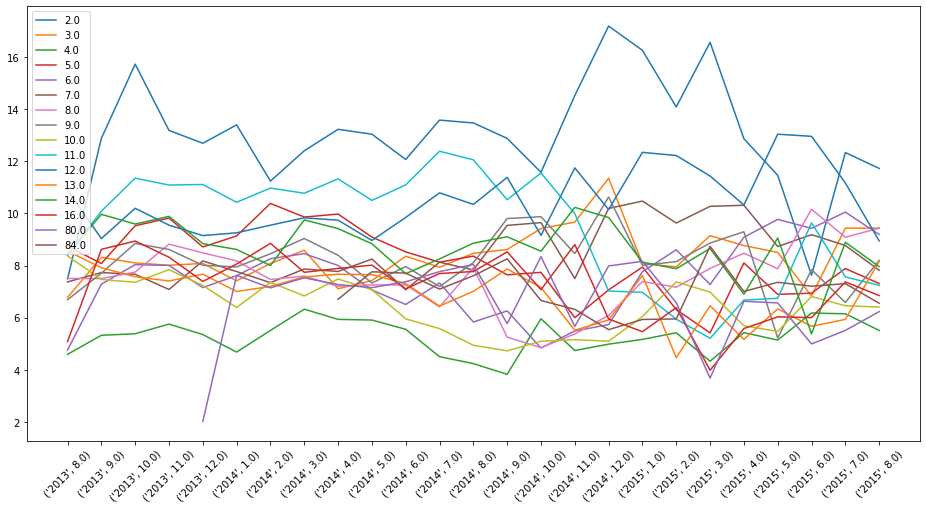

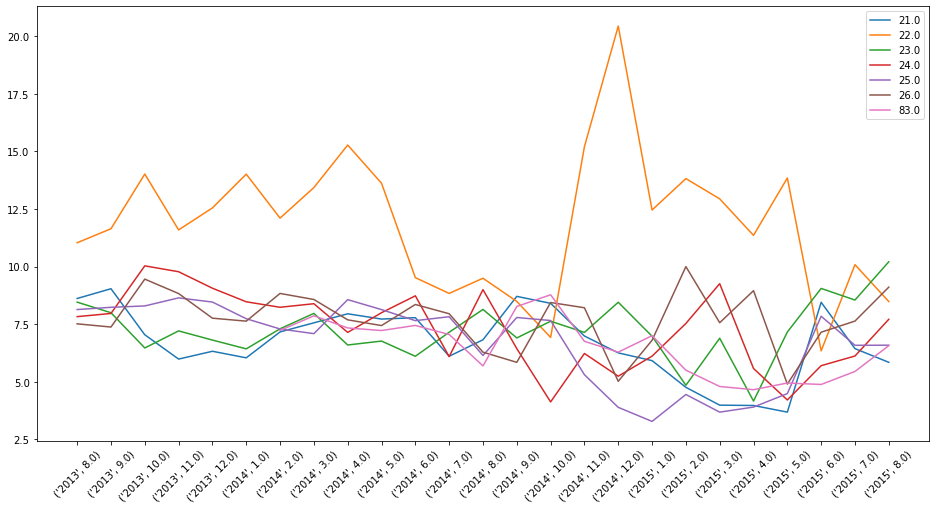

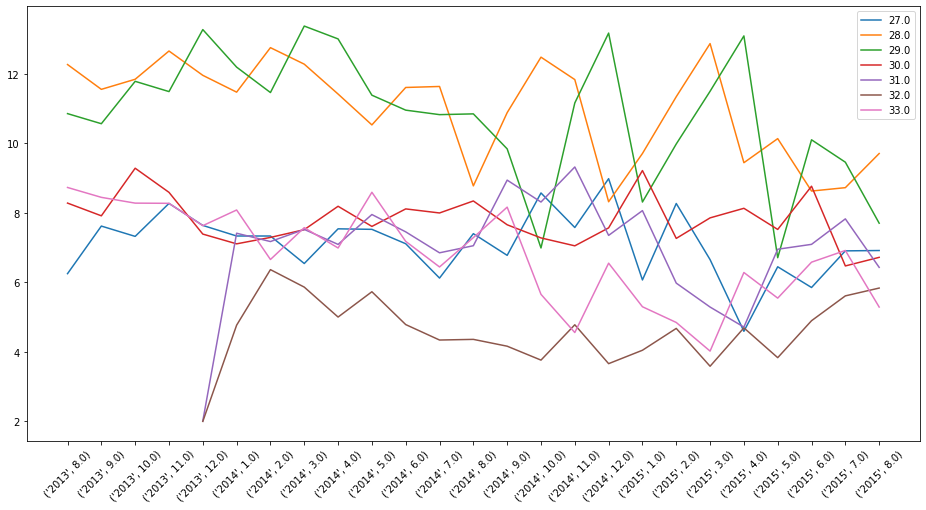

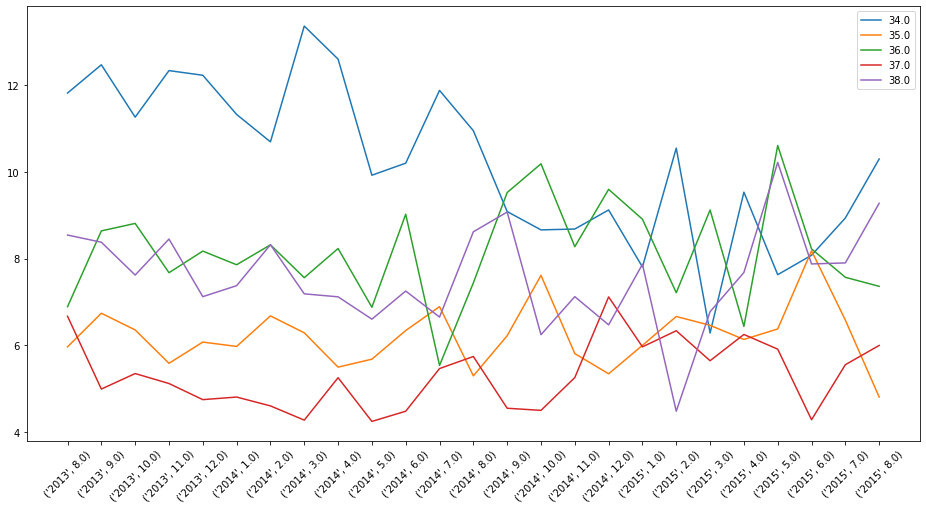

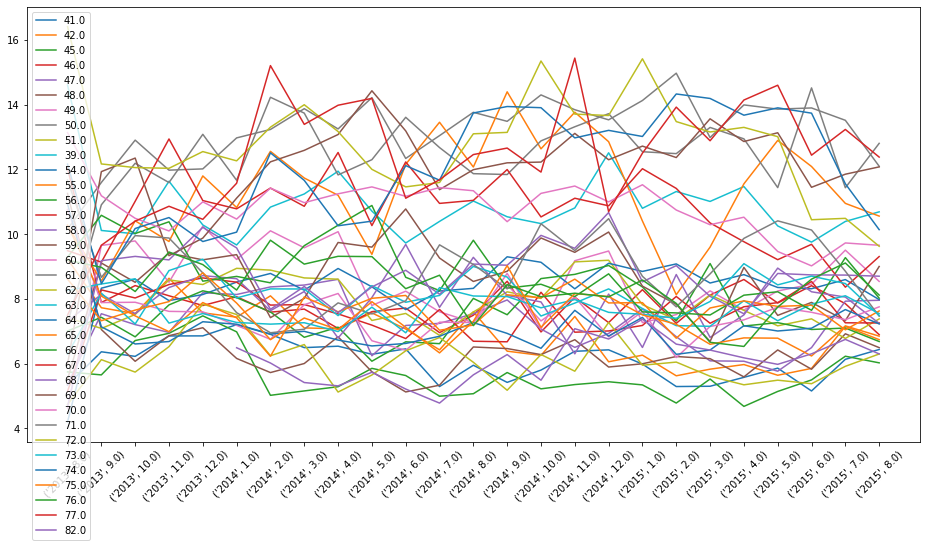

In [287]:
for i in data.city_zip.unique():
    c = data[data.city_zip == i]
    plt.figure(figsize=(16, 8))
    for idx in c.station_id.unique(): # data.station_id.unique()
        si = c[c.station_id == idx].groupby(['year', 'month']).mean()
        plt.plot([str(i) for i in si.index], si.bikes_available, label=idx)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

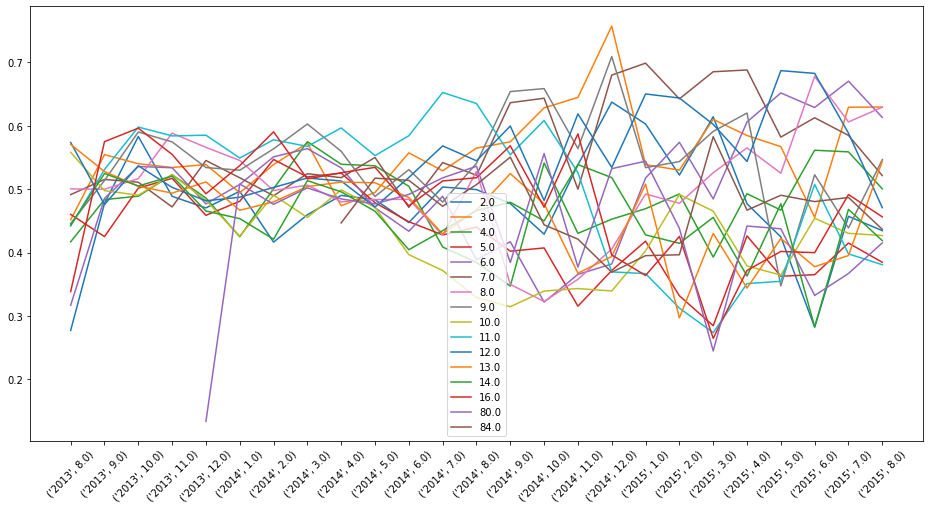

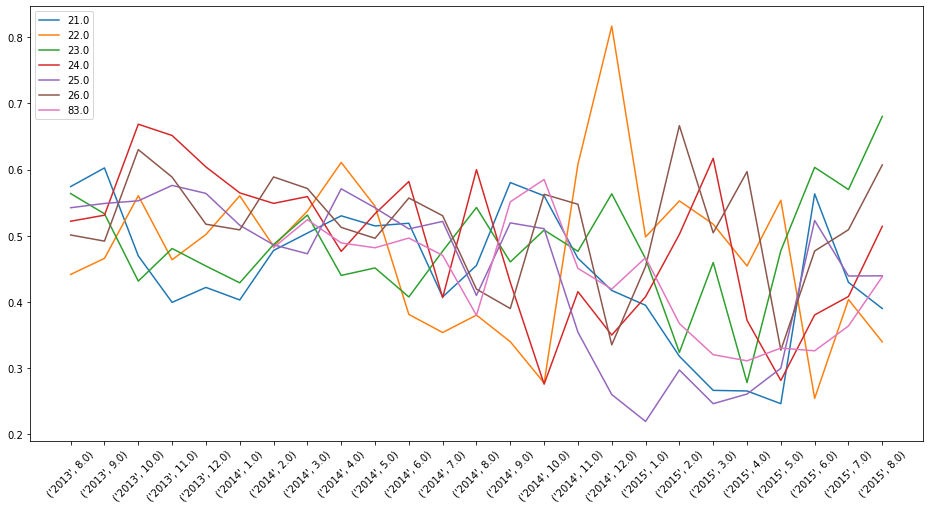

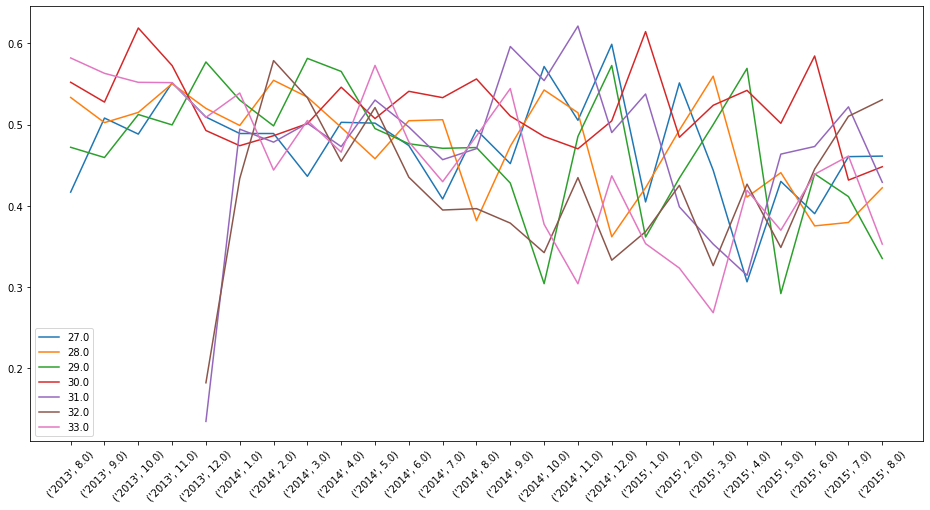

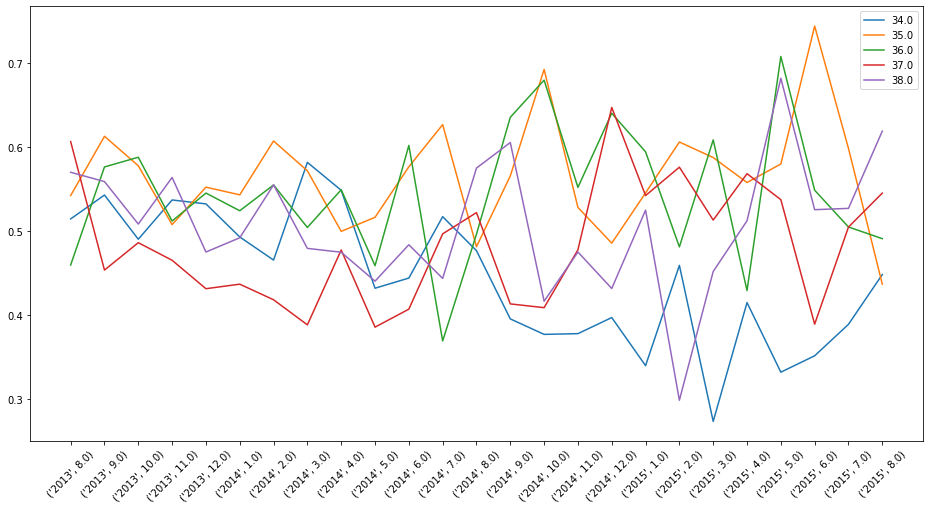

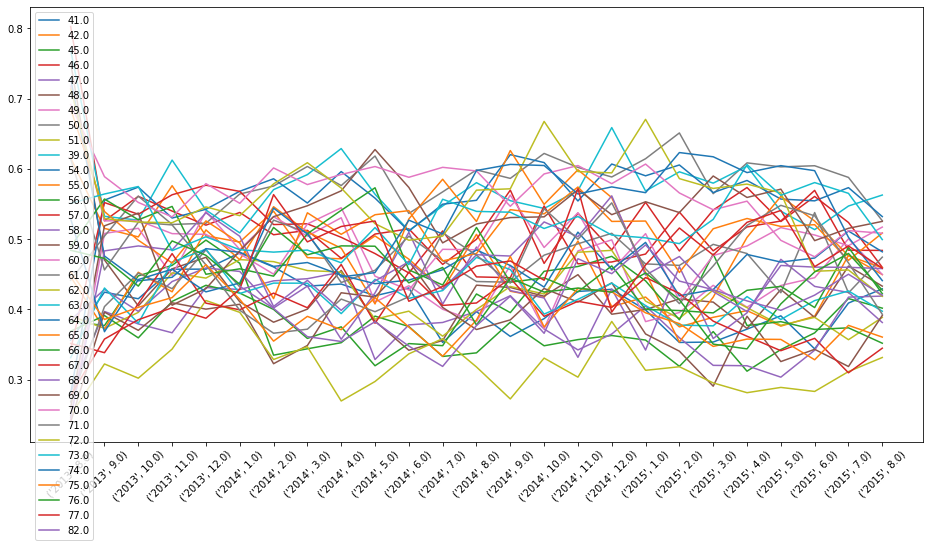

In [292]:
for i in data.city_zip.unique():
    c = data[data.city_zip == i]
    plt.figure(figsize=(16, 8))
    for idx in c.station_id.unique(): # data.station_id.unique()
        si = c[c.station_id == idx].groupby(['year', 'month']).mean()
        plt.plot([str(i) for i in si.index], si.bikes_available_percentage, label=idx)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

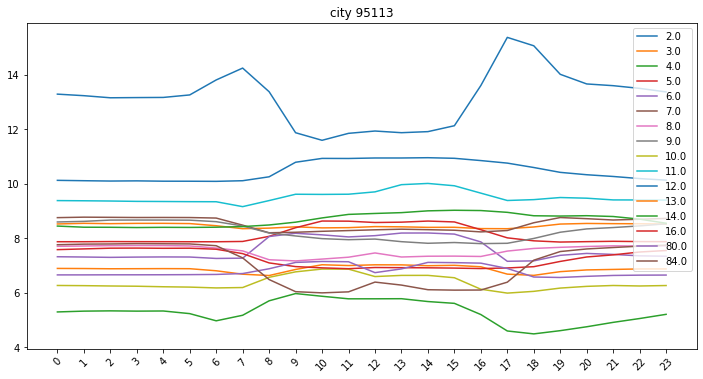

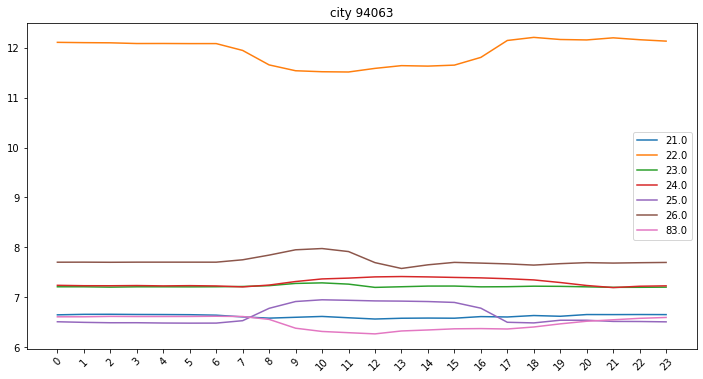

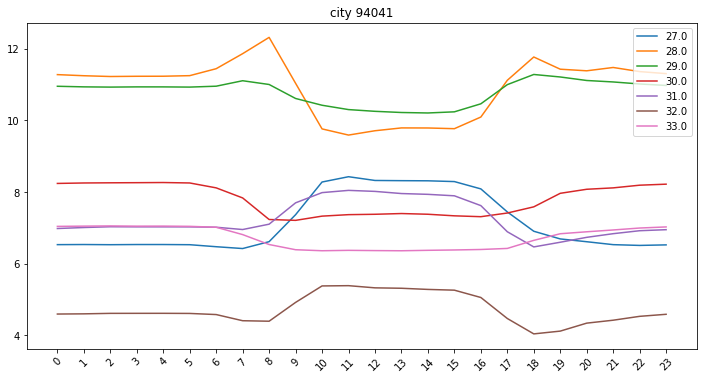

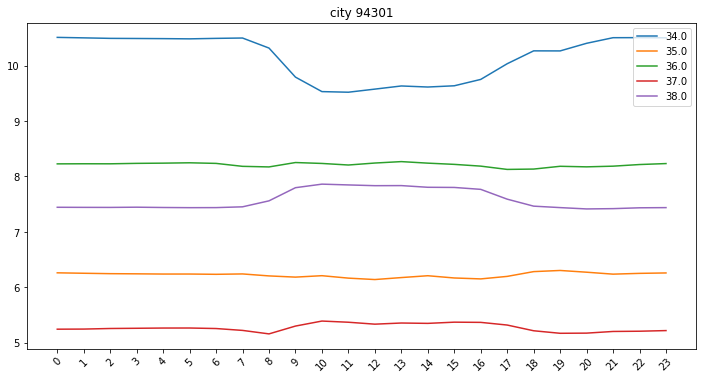

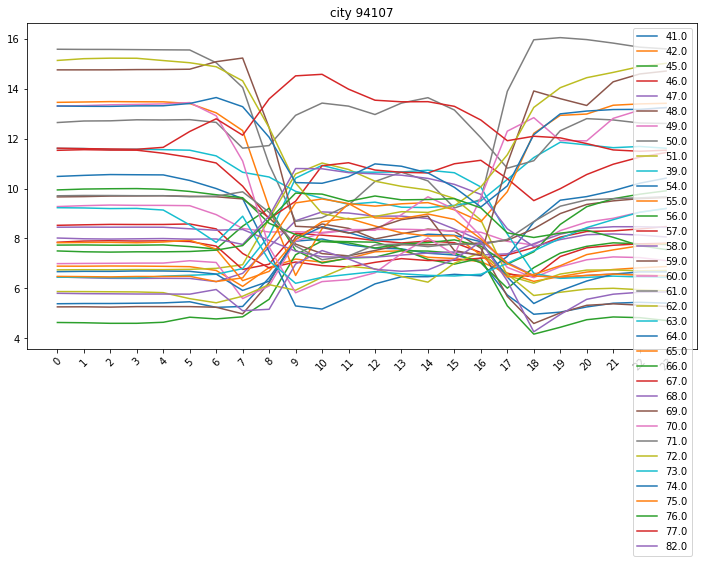

In [288]:
for i in data.city_zip.unique():
    c = data[data.city_zip == i]
    plt.figure(figsize=(12, 6))
    for idx in c.station_id.unique(): # data.station_id.unique()
        si = c[c.station_id == idx].groupby(['hour']).mean()
        plt.plot([str(i) for i in si.index], si.bikes_available, label=idx)
        plt.title(f"city {int(i)}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

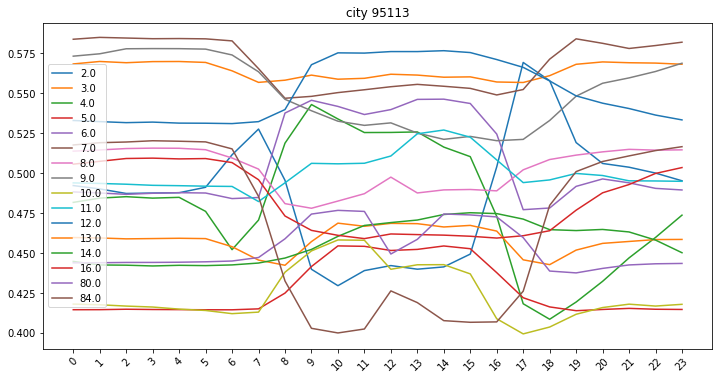

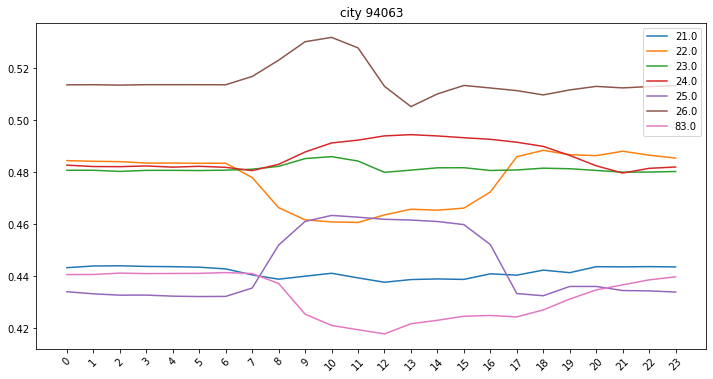

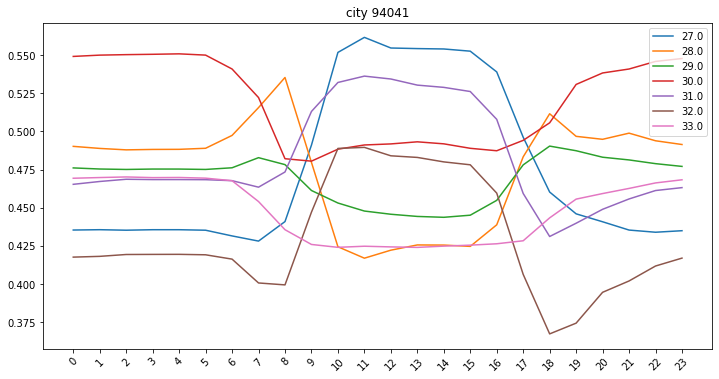

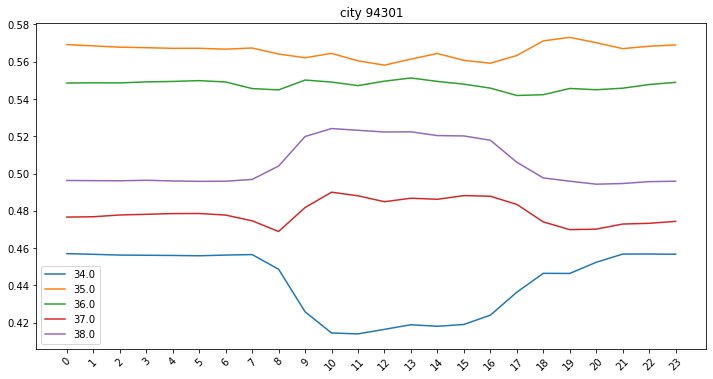

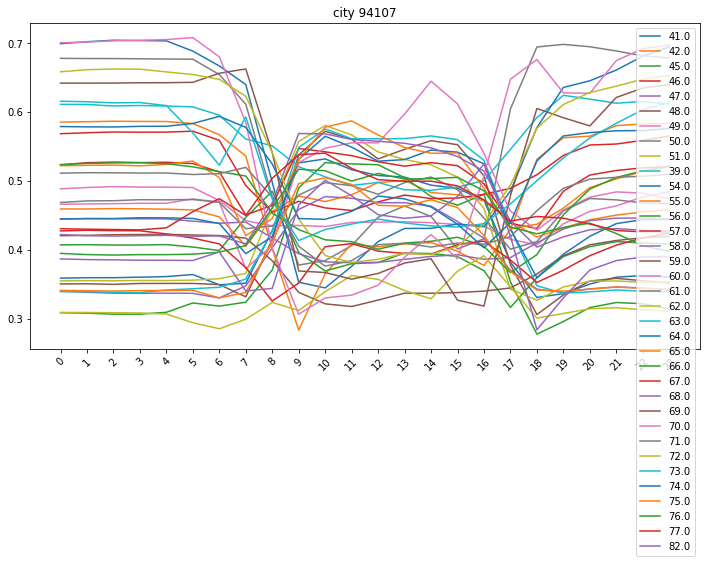

In [289]:
for i in data.city_zip.unique():
    c = data[data.city_zip == i]
    plt.figure(figsize=(12, 6))
    for idx in c.station_id.unique(): # data.station_id.unique()
        si = c[c.station_id == idx].groupby(['hour']).mean()
        plt.plot([str(i) for i in si.index], si.bikes_available_percentage, label=idx)
        plt.title(f"city {int(i)}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [ ]:
08:00-17:00 each day

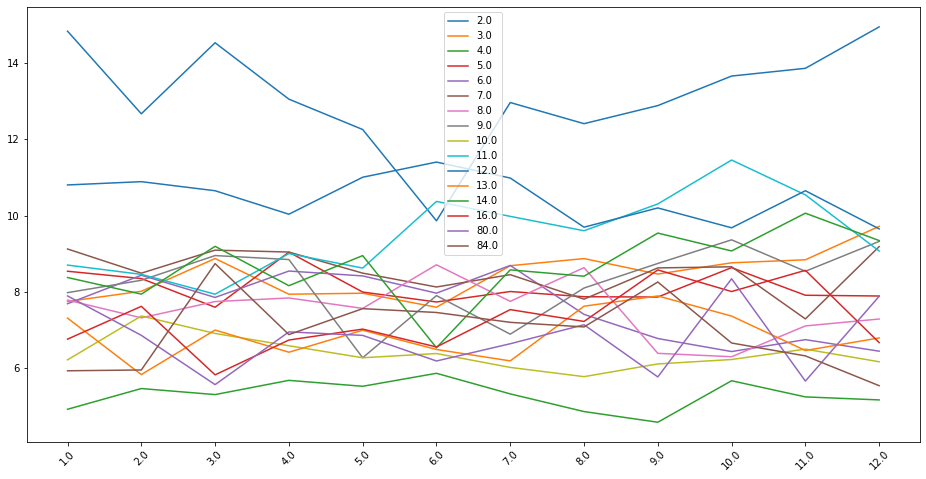

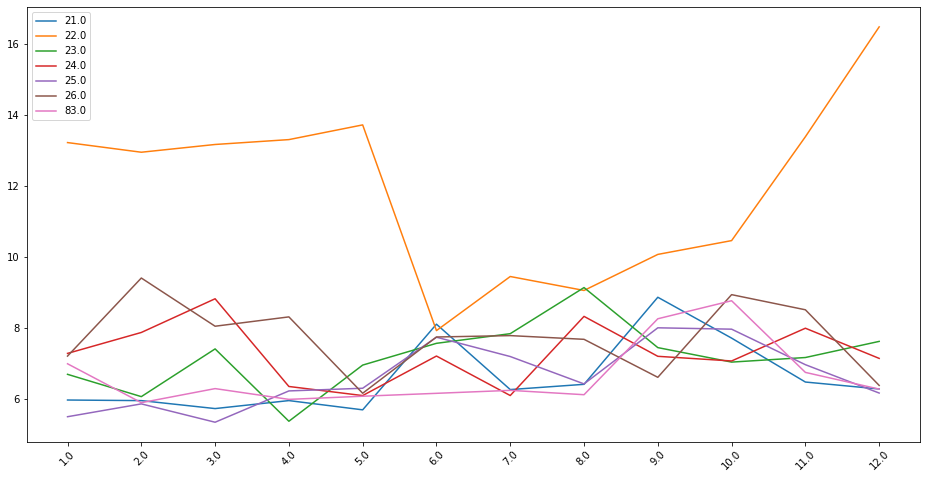

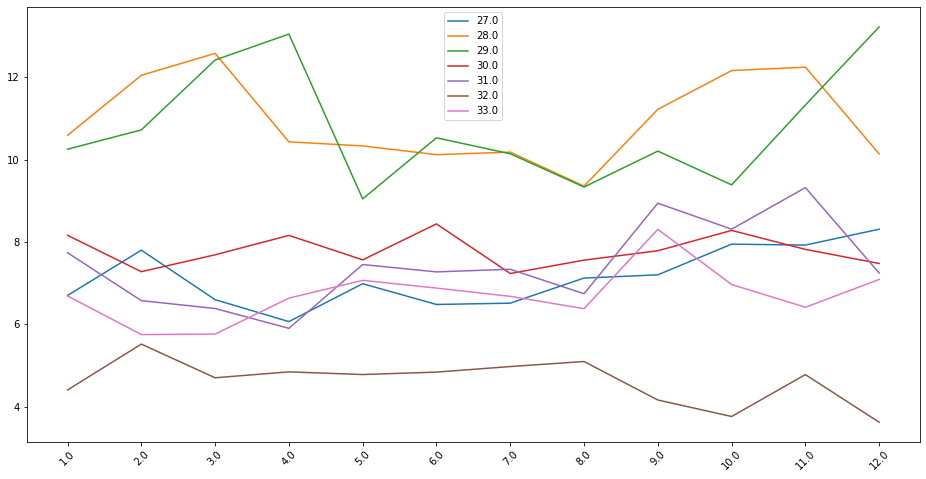

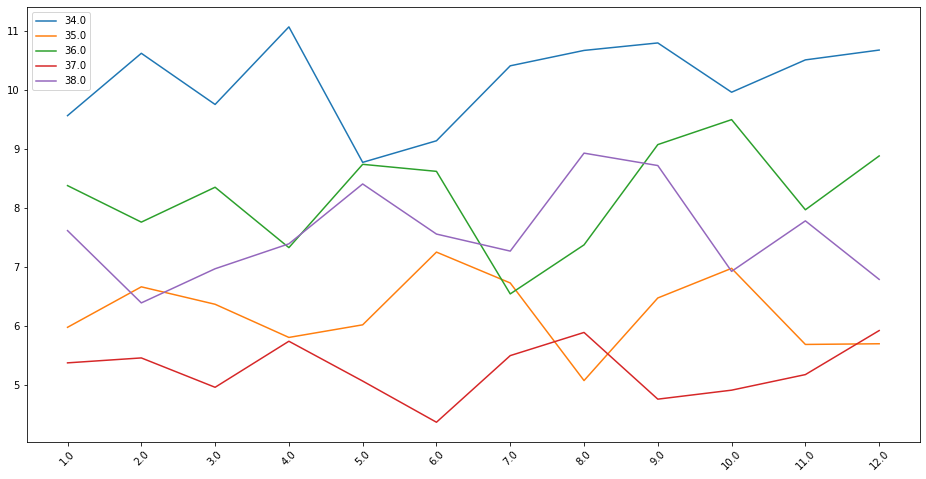

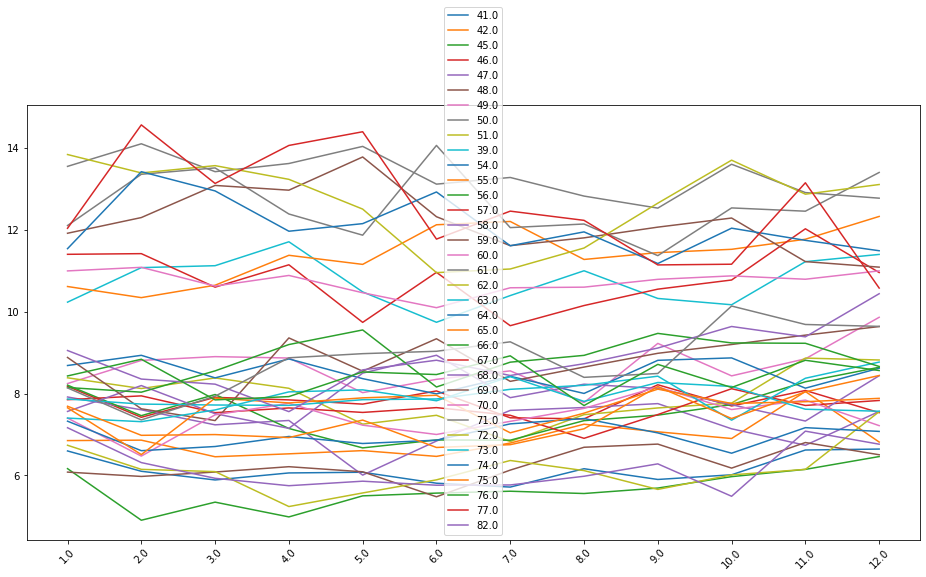

In [290]:
for i in data.city_zip.unique():
    c = data[data.city_zip == i]
    plt.figure(figsize=(16, 8))
    for idx in c.station_id.unique(): # data.station_id.unique()
        si = c[c.station_id == idx].groupby(['month']).mean()
        plt.plot([str(i) for i in si.index], si.bikes_available, label=idx)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

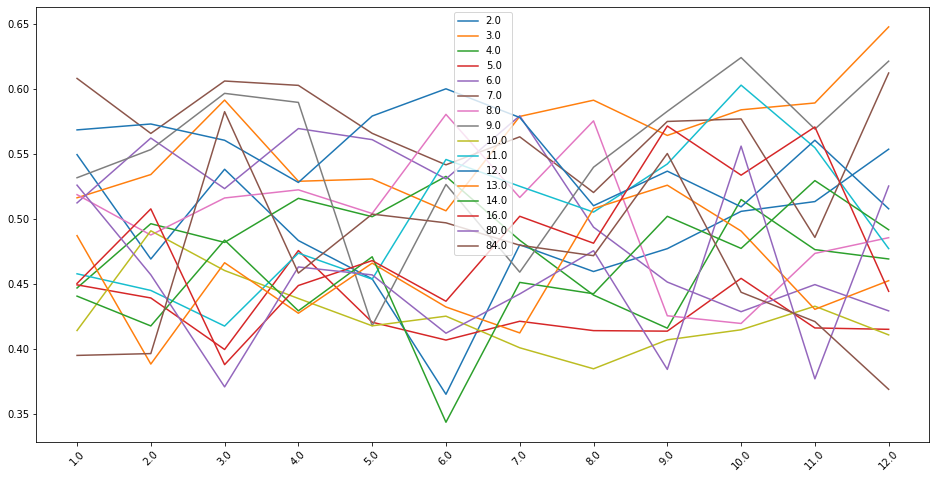

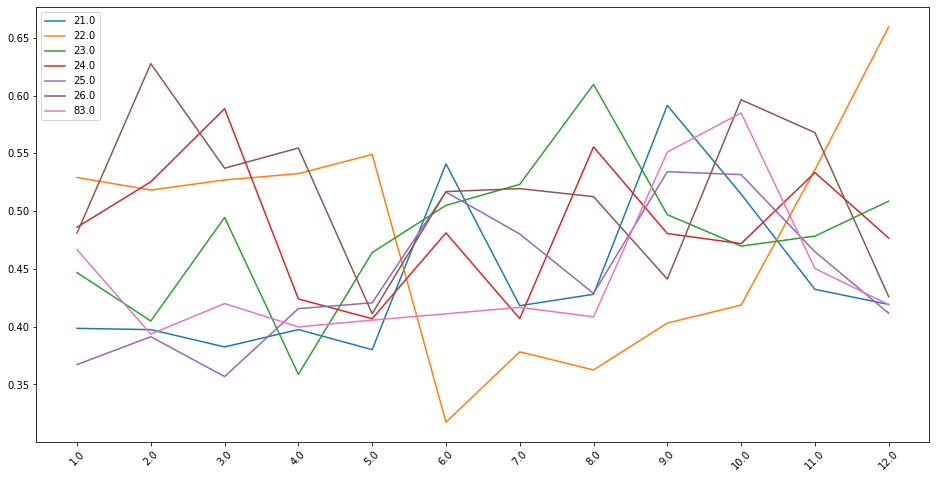

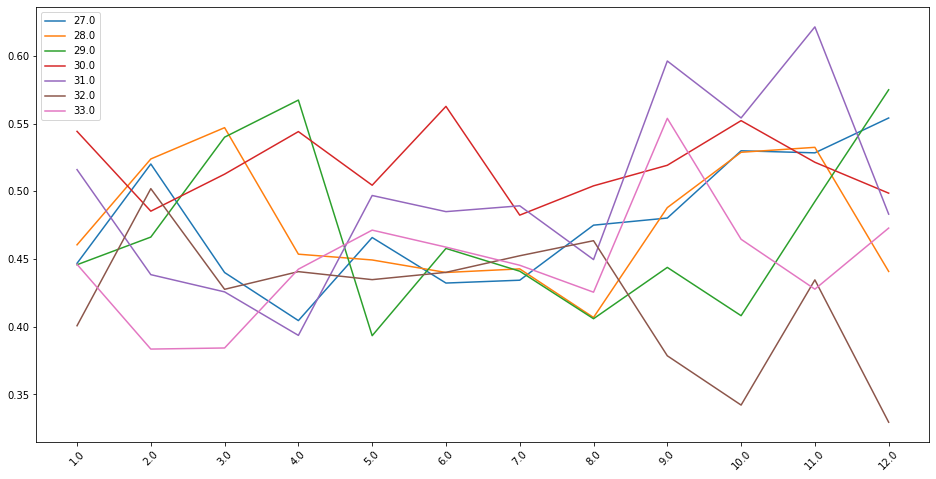

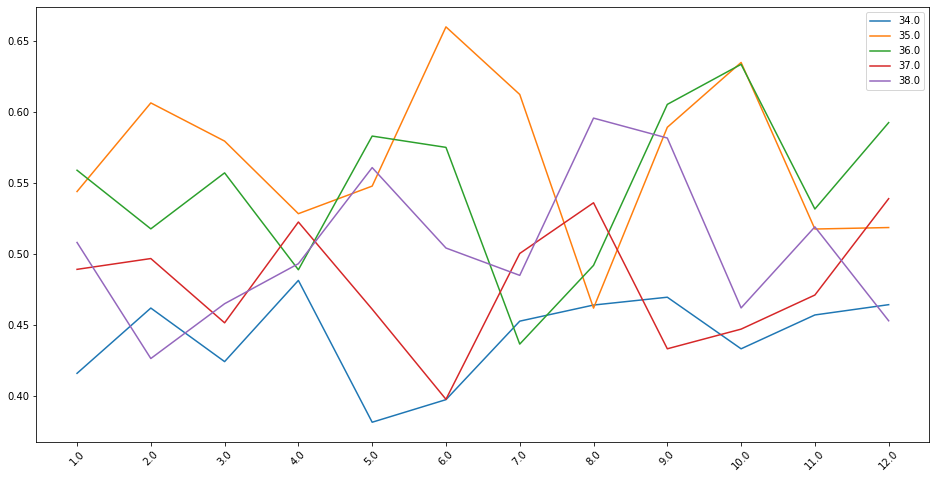

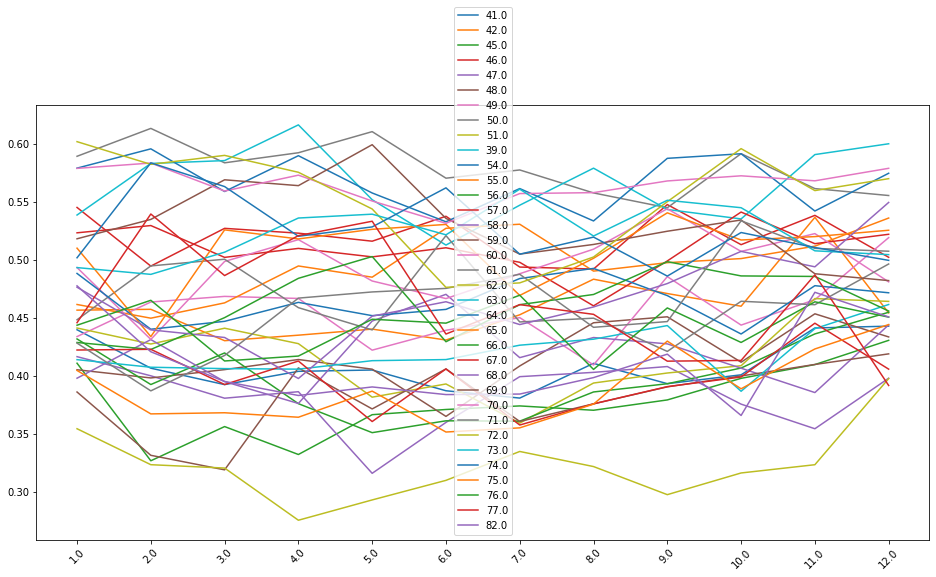

In [291]:
for i in data.city_zip.unique():
    c = data[data.city_zip == i]
    plt.figure(figsize=(16, 8))
    for idx in c.station_id.unique(): # data.station_id.unique()
        si = c[c.station_id == idx].groupby(['month']).mean()
        plt.plot([str(i) for i in si.index], si.bikes_available_percentage, label=idx)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [50]:
data[data.events == 1]

time  hour  station_id  bikes_available  docks_available  \
84       2013/09/02     0         2.0        11.290909        15.709091   
85       2013/09/02     1         2.0        11.423077        15.576923   
86       2013/09/02     2         2.0        11.269231        15.730769   
87       2013/09/02     3         2.0        11.431373        15.568627   
88       2013/09/02     4         2.0        11.365385        15.634615   
...             ...   ...         ...              ...              ...   
1204229  2015/08/06    19        84.0         5.000000        10.000000   
1204230  2015/08/06    20        84.0         5.000000        10.000000   
1204231  2015/08/06    21        84.0         5.000000        10.000000   
1204232  2015/08/06    22        84.0         5.000000        10.000000   
1204233  2015/08/06    23        84.0         5.000000        10.000000   

         city_zip  month  dayofweek  dock_count  max_temperature_f  ...  \
84        95113.0    9.0        0.0          27               79.0  ...   
85        95113.0    9.0        0.0          27               79.0  ...   
86        95113.0    9.0        0.0          27               79.0  ...   
87        95113.0    9.0        0.0          27               79.0  ...   
88        95113.0    9.0        0.0          27               79.0  ...   
...           ...    ...        ...         ...                ...  ...   
1204229   95113.0    8.0        3.0          15               78.0  ...   
1204230   95113.0    8.0        3.0          15               78.0  ...   
1204231   95113.0    8.0        3.0          15               78.0  ...   
1204232   95113.0    8.0        3.0          15               78.0  ...   
1204233   95113.0    8.0        3.0          15               78.0  ...   

         mean_visibility_miles  min_visibility_miles  max_wind_Speed_mph  \
84                        10.0                  10.0                21.0   
85                        10.0                  10.0                21.0   
86                        10.0                  10.0                21.0   
87                        10.0                  10.0                21.0   
88                        10.0                  10.0                21.0   
...                        ...                   ...                 ...   
1204229                   10.0                   8.0                21.0   
1204230                   10.0                   8.0                21.0   
1204231                   10.0                   8.0                21.0   
1204232                   10.0                   8.0                21.0   
1204233                   10.0                   8.0                21.0   

         mean_wind_speed_mph  max_gust_speed_mph  precipitation_inches  \
84                       8.0                25.0                  0.00   
85                       8.0                25.0                  0.00   
86                       8.0                25.0                  0.00   
87                       8.0                25.0                  0.00   
88                       8.0                25.0                  0.00   
...                      ...                 ...                   ...   
1204229                  5.0                26.0                  0.02   
1204230                  5.0                26.0                  0.02   
1204231                  5.0                26.0                  0.02   
1204232                  5.0                26.0                  0.02   
1204233                  5.0                26.0                  0.02   

         cloud_cover  events  wind_dir_degrees  year  
84               5.0       1             315.0  2013  
85               5.0       1             315.0  2013  
86               5.0       1             315.0  2013  
87               5.0       1             315.0  2013  
88               5.0       1             315.0  2013  
...              ...     ...               ...   ...  
1204229          5.0      

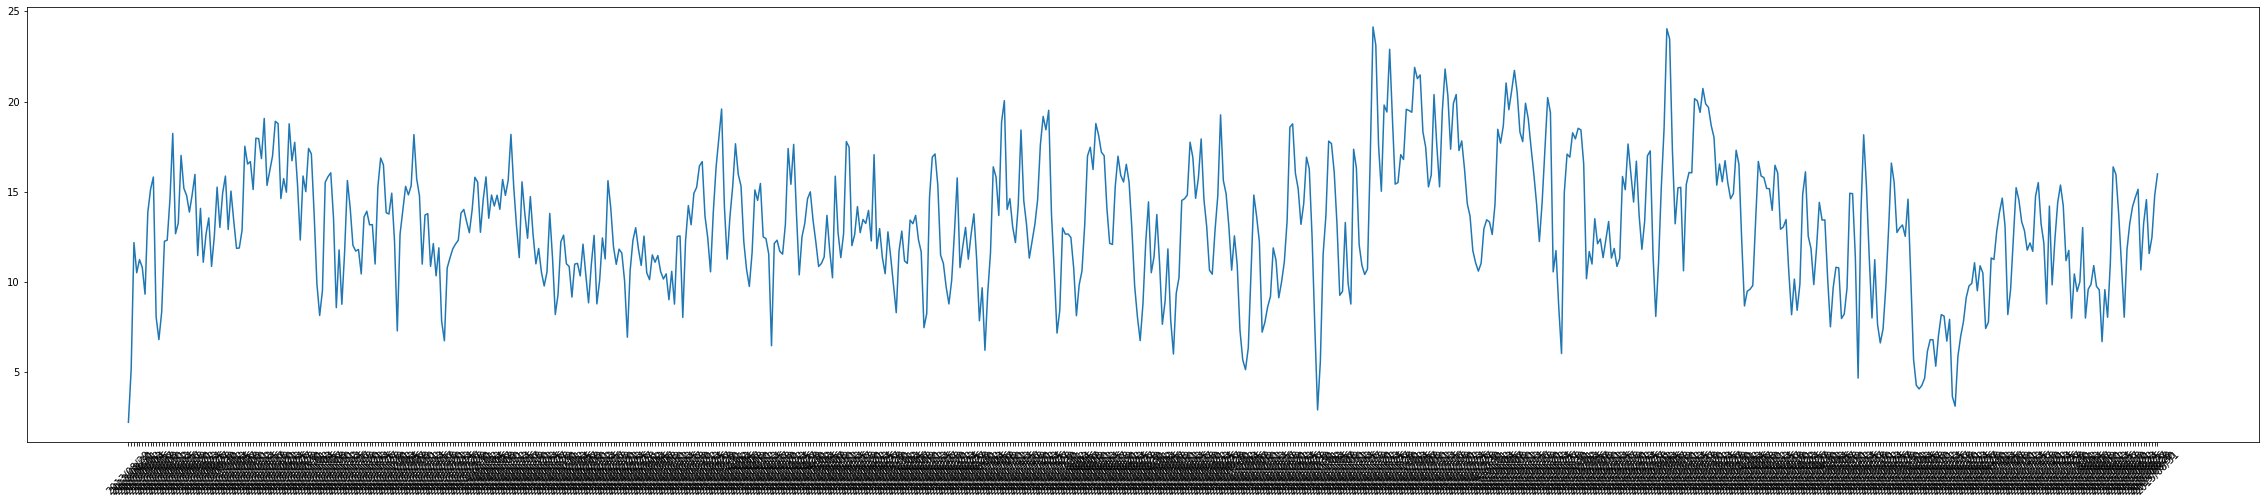

In [18]:
s2 = data[data.station_id == 2].groupby(['time']).mean()
plt.figure(figsize=(40, 8))
plt.plot(s2.index, s2.bikes_available)
plt.xticks(rotation=45)
plt.show()

In [42]:
[str(i) for i in data[data.station_id == 2].groupby(['year', 'month']).mean().index]

["('2013', 8.0)",
 "('2013', 9.0)",
 "('2013', 10.0)",
 "('2013', 11.0)",
 "('2013', 12.0)",
 "('2014', 1.0)",
 "('2014', 2.0)",
 "('2014', 3.0)",
 "('2014', 4.0)",
 "('2014', 5.0)",
 "('2014', 6.0)",
 "('2014', 7.0)",
 "('2014', 8.0)",
 "('2014', 9.0)",
 "('2014', 10.0)",
 "('2014', 11.0)",
 "('2014', 12.0)",
 "('2015', 1.0)",
 "('2015', 2.0)",
 "('2015', 3.0)",
 "('2015', 4.0)",
 "('2015', 5.0)",
 "('2015', 6.0)",
 "('2015', 7.0)",
 "('2015', 8.0)"]

In [25]:

data[data.station_id == 2]

time  hour  station_id  bikes_available  docks_available  \
0      2013/08/29    12         2.0         2.000000        25.000000   
1      2013/08/29    13         2.0         2.698113        24.301887   
2      2013/08/29    14         2.0         2.000000        25.000000   
3      2013/08/29    15         2.0         2.000000        25.000000   
4      2013/08/29    16         2.0         2.000000        25.000000   
...           ...   ...         ...              ...              ...   
17522  2015/08/31    19         2.0        17.900000         9.100000   
17523  2015/08/31    20         2.0        18.000000         9.000000   
17524  2015/08/31    21         2.0        18.000000         9.000000   
17525  2015/08/31    22         2.0        18.000000         9.000000   
17526  2015/08/31    23         2.0        18.000000         9.000000   

       city_zip  month  dayofweek  dock_count  max_temperature_f  ...  \
0       95113.0    8.0        3.0          27               81.0  ...   
1       95113.0    8.0        3.0          27               81.0  ...   
2       95113.0    8.0        3.0          27               81.0  ...   
3       95113.0    8.0        3.0          27               81.0  ...   
4       95113.0    8.0        3.0          27               81.0  ...   
...         ...    ...        ...         ...                ...  ...   
17522   95113.0    8.0        0.0          27               85.0  ...   
17523   95113.0    8.0        0.0          27               85.0  ...   
17524   95113.0    8.0        0.0          27               85.0  ...   
17525   95113.0    8.0        0.0          27               85.0  ...   
17526   95113.0    8.0        0.0          27               85.0  ...   

       max_visibility_miles  mean_visibility_miles  min_visibility_miles  \
0                      10.0                   10.0                  10.0   
1                      10.0                   10.0                  10.0   
2                      10.0                   10.0                  10.0   
3                      10.0                   10.0                  10.0   
4                      10.0                   10.0                  10.0   
...                     ...                    ...                   ...   
17522                  10.0                   10.0                  10.0   
17523                  10.0                   10.0                  10.0   
17524                  10.0                   10.0                  10.0   
17525                  10.0                   10.0                  10.0   
17526                  10.0                   10.0                  10.0   

       max_wind_Speed_mph  mean_wind_speed_mph  max_gust_speed_mph  \
0                    16.0                  7.0                24.0   
1                    16.0                  7.0                24.0   
2                    16.0                  7.0                24.0   
3                    16.0                  7.0                24.0   
4                    16.0                  7.0                24.0   
...                   ...                  ...                 ...   
17522                20.0                  6.0                24.0   
17523                20.0                  6.0                24.0   
17524                20.0                  6.0                24.0   
17525                20.0                  6.0                24.0   
17526                20.0                  6.0                24.0   

       precipitation_inches  cloud_cover  events  wind_dir_degrees  
0                       0.0          4.0       0             320.0  
1                       0.0          4.0       0             320.0  
2                       0.0          4.0       0             320.0  
3                       0.0          4.0       0             320.0  
4                       0.0          4.0       0             320.0  
...                     ...          ...     ...               ...  
17522                 

In [56]:
trip = pd.read_csv("./bikeshare/trip.csv")
trip

id  duration       start_date  \
0         4576        63  8/29/2013 14:13   
1         4607        70  8/29/2013 14:42   
2         4130        71  8/29/2013 10:16   
3         4251        77  8/29/2013 11:29   
4         4299        83  8/29/2013 12:02   
...        ...       ...              ...   
669954  432951       619    9/1/2014 4:21   
669955  432950      6712    9/1/2014 3:16   
669956  432949       538    9/1/2014 0:05   
669957  432948       568    9/1/2014 0:05   
669958  432947       569    9/1/2014 0:05   

                          start_station_name  start_station_id  \
0                   South Van Ness at Market                66   
1                         San Jose City Hall                10   
2                    Mountain View City Hall                27   
3                         San Jose City Hall                10   
4                   South Van Ness at Market                66   
...                                      ...               ...   
669954                    Powell Street BART                39   
669955  Harry Bridges Plaza (Ferry Building)                50   
669956              South Van Ness at Market                66   
669957              South Van Ness at Market                66   
669958              South Van Ness at Market                66   

               end_date                          end_station_name  \
0       8/29/2013 14:14                  South Van Ness at Market   
1       8/29/2013 14:43                        San Jose City Hall   
2       8/29/2013 10:17                   Mountain View City Hall   
3       8/29/2013 11:30                        San Jose City Hall   
4       8/29/2013 12:04                            Market at 10th   
...                 ...                                       ...   
669954    9/1/2014 4:32                           Townsend at 7th   
669955    9/1/2014 5:08  San Francisco Caltrain (Townsend at 4th)   
669956    9/1/2014 0:14                             5th at Howard   
669957    9/1/2014 0:15                             5th at Howard   
669958    9/1/2014 0:15                             5th at Howard   

        end_station_id  bike_id subscription_type zip_code  
0                   66      520        Subscriber    94127  
1                   10      661        Subscriber    95138  
2                   27       48        Subscriber    97214  
3                   10       26        Subscriber    95060  
4                   67      319        Subscriber    94103  
...                ...      ...               ...      ...  
669954              65      335        Subscriber    94118  
669955              70      259          Customer    44100  
669956              57      466          Customer       32  
669957              57      461          Customer       32  
669958              57      318          Customer       32  

[669959 rows x 11 columns]

In [57]:
trip.duration.describe() # time of trip in seconds

count    6.699590e+05
mean     1.107950e+03
std      2.225544e+04
min      6.000000e+01
25%      3.440000e+02
50%      5.170000e+02
75%      7.550000e+02
max      1.727040e+07
Name: duration, dtype: float64

In [71]:
trip.duration[trip.duration < 5000].describe()

count    652988.000000
mean        622.051414
std         508.369561
min          60.000000
25%         340.000000
50%         507.000000
75%         731.000000
max        4999.000000
Name: duration, dtype: float64

### Trip EDA

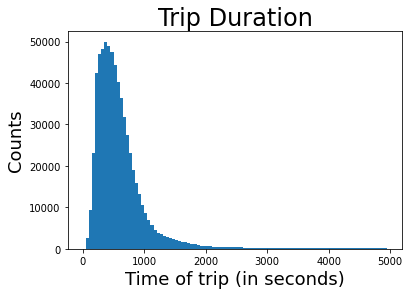

In [130]:
plt.figure(figsize=(6, 4))
plt.title("Trip Duration", fontsize=24)
plt.xlabel("Time of trip (in seconds)", fontsize=18)
plt.ylabel("Counts", fontsize=18)
plt.hist(trip.duration, bins= np.arange(0, 5000, 50))
# plt.xlim(xmin=0.0, xmax = 2000)
plt.show()

In [69]:
trip.duration.median()

517.0

In [311]:
# trip.start_date.dt.strftime("%w").astype("int64")
trip['start_date'] = trip['start_date'].apply(lambda x: pd.to_datetime(x))
trip.loc[:, 'month'] = pd.to_datetime(trip.start_date, format='%Y-%m-%d %H:%M:%S').dt.month
trip.loc[:, 'dayofweek'] = pd.to_datetime(trip.start_date, format='%Y-%m-%d %H:%M:%S').dt.dayofweek
trip.loc[:, 'hour'] = pd.to_datetime(trip.start_date, format='%Y-%m-%d %H:%M:%S').dt.hour
trip

id  duration          start_date  \
0         4576        63 2013-08-29 14:13:00   
1         4607        70 2013-08-29 14:42:00   
2         4130        71 2013-08-29 10:16:00   
3         4251        77 2013-08-29 11:29:00   
4         4299        83 2013-08-29 12:02:00   
...        ...       ...                 ...   
669954  432951       619 2014-09-01 04:21:00   
669955  432950      6712 2014-09-01 03:16:00   
669956  432949       538 2014-09-01 00:05:00   
669957  432948       568 2014-09-01 00:05:00   
669958  432947       569 2014-09-01 00:05:00   

                          start_station_name  start_station_id  \
0                   South Van Ness at Market                66   
1                         San Jose City Hall                10   
2                    Mountain View City Hall                27   
3                         San Jose City Hall                10   
4                   South Van Ness at Market                66   
...                                      ...               ...   
669954                    Powell Street BART                39   
669955  Harry Bridges Plaza (Ferry Building)                50   
669956              South Van Ness at Market                66   
669957              South Van Ness at Market                66   
669958              South Van Ness at Market                66   

               end_date                          end_station_name  \
0       8/29/2013 14:14                  South Van Ness at Market   
1       8/29/2013 14:43                        San Jose City Hall   
2       8/29/2013 10:17                   Mountain View City Hall   
3       8/29/2013 11:30                        San Jose City Hall   
4       8/29/2013 12:04                            Market at 10th   
...                 ...                                       ...   
669954    9/1/2014 4:32                           Townsend at 7th   
669955    9/1/2014 5:08  San Francisco Caltrain (Townsend at 4th)   
669956    9/1/2014 0:14                             5th at Howard   
669957    9/1/2014 0:15                             5th at Howard   
669958    9/1/2014 0:15                             5th at Howard   

        end_station_id  bike_id subscription_type zip_code  month  dayofweek  \
0                   66      520        Subscriber    94127      8          3   
1                   10      661        Subscriber    95138      8          3   
2                   27       48        Subscriber    97214      8          3   
3                   10       26        Subscriber    95060      8          3   
4                   67      319        Subscriber    94103      8          3   
...                ...      ...               ...      ...    ...        ...   
669954              65      335        Subscriber    94118      9          0   
669955              70      259          Customer    44100      9          0   
669956              57      466          Customer       32      9          0   
669957              57      461          Customer       32      9          0   
669958              57      318          Customer       32      9          0   

        hour  
0         14  
1         14  
2         10  
3         11  
4         12  
...      ...  
669954     4  
669955     3  
669956     0  
669957     0  
669958     0  

[669959 rows x 14 columns]

<AxesSubplot:>

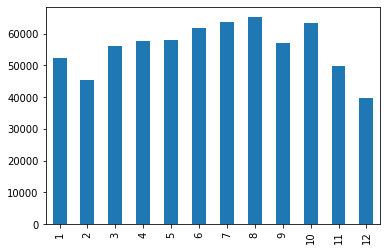

In [318]:
trip['month'].value_counts().sort_index().plot.bar()

([<matplotlib.axis.XTick at 0x260178d0d00>,
 [Text(0, 0, 'Mon.'),
  Text(1, 0, 'Tue.'),
  Text(2, 0, 'Wed.'),
  Text(3, 0, 'Thr.'),
  Text(4, 0, 'Fri.'),
  Text(5, 0, 'Sat.'),
  Text(6, 0, 'Sun.')])

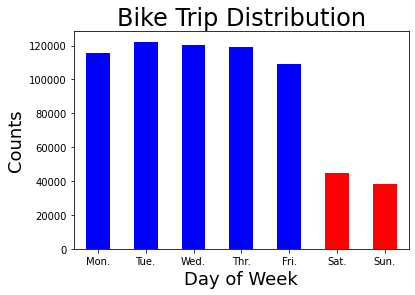

In [434]:
trip['dayofweek'].value_counts().sort_index().plot.bar(color=['b', 'b', 'b', 'b', 'b', 'r', 'r'])
plt.title("Bike Trip Distribution", fontsize=24)
plt.ylabel("Counts", fontsize=18)
plt.xlabel("Day of Week", fontsize=18)
plt.xticks(np.arange(7), ('Mon.', 'Tue.', 'Wed.', 'Thr.', 'Fri.', 'Sat.', 'Sun.'), rotation=0)
# trip['dayofweek'].value_counts().sort_index().plot()

Text(0.5, 0, 'Hour')

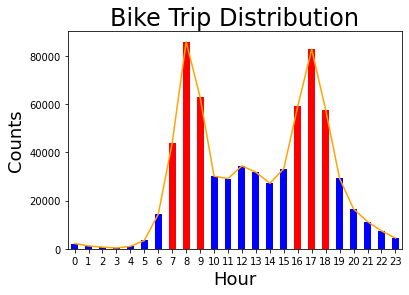

In [435]:
trip['hour'].value_counts().sort_index().plot.bar(color=['b']*7+['r']*3+['b']*6+['r']*3+['b']*5)
trip['hour'].value_counts().sort_index().plot(color='orange')
plt.title("Bike Trip Distribution", fontsize=24)
plt.ylabel("Counts", fontsize=18)
plt.xlabel("Hour", fontsize=18)

In [335]:
weekdays = trip[trip['dayofweek'] < 5]
weekends = trip[trip['dayofweek'] >= 5]

In [334]:
trip.dayofweek.unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

Text(0.5, 0, 'Hour')

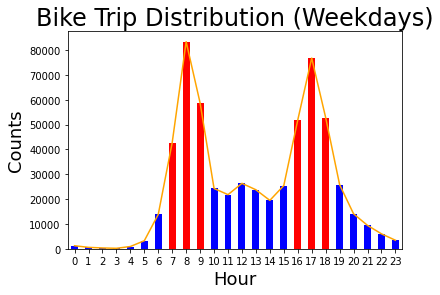

In [437]:
weekdays['hour'].value_counts().sort_index().plot.bar(color=['b']*7+['r']*3+['b']*6+['r']*3+['b']*5)
weekdays['hour'].value_counts().sort_index().plot(color='orange')
plt.title("Bike Trip Distribution (Weekdays)", fontsize=24)
plt.ylabel("Counts", fontsize=18)
plt.xlabel("Hour", fontsize=18)

Text(0.5, 0, 'Hour')

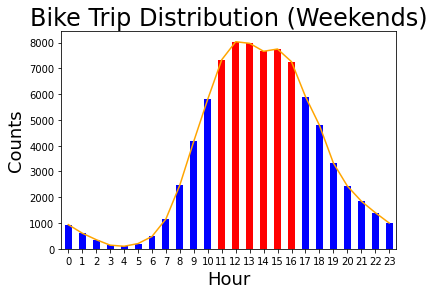

In [439]:
weekends['hour'].value_counts().sort_index().plot.bar(color=['b']*11+['r']*6+['b']*7)
weekends['hour'].value_counts().sort_index().plot(color='orange')
plt.title("Bike Trip Distribution (Weekends)", fontsize=24)
plt.ylabel("Counts", fontsize=18)
plt.xlabel("Hour", fontsize=18)

In [306]:
trip

id  duration       start_date  \
0         4576        63  8/29/2013 14:13   
1         4607        70  8/29/2013 14:42   
2         4130        71  8/29/2013 10:16   
3         4251        77  8/29/2013 11:29   
4         4299        83  8/29/2013 12:02   
...        ...       ...              ...   
669954  432951       619    9/1/2014 4:21   
669955  432950      6712    9/1/2014 3:16   
669956  432949       538    9/1/2014 0:05   
669957  432948       568    9/1/2014 0:05   
669958  432947       569    9/1/2014 0:05   

                          start_station_name  start_station_id  \
0                   South Van Ness at Market                66   
1                         San Jose City Hall                10   
2                    Mountain View City Hall                27   
3                         San Jose City Hall                10   
4                   South Van Ness at Market                66   
...                                      ...               ...   
669954                    Powell Street BART                39   
669955  Harry Bridges Plaza (Ferry Building)                50   
669956              South Van Ness at Market                66   
669957              South Van Ness at Market                66   
669958              South Van Ness at Market                66   

               end_date                          end_station_name  \
0       8/29/2013 14:14                  South Van Ness at Market   
1       8/29/2013 14:43                        San Jose City Hall   
2       8/29/2013 10:17                   Mountain View City Hall   
3       8/29/2013 11:30                        San Jose City Hall   
4       8/29/2013 12:04                            Market at 10th   
...                 ...                                       ...   
669954    9/1/2014 4:32                           Townsend at 7th   
669955    9/1/2014 5:08  San Francisco Caltrain (Townsend at 4th)   
669956    9/1/2014 0:14                             5th at Howard   
669957    9/1/2014 0:15                             5th at Howard   
669958    9/1/2014 0:15                             5th at Howard   

        end_station_id  bike_id subscription_type zip_code  
0                   66      520        Subscriber    94127  
1                   10      661        Subscriber    95138  
2                   27       48        Subscriber    97214  
3                   10       26        Subscriber    95060  
4                   67      319        Subscriber    94103  
...                ...      ...               ...      ...  
669954              65      335        Subscriber    94118  
669955              70      259          Customer    44100  
669956              57      466          Customer       32  
669957              57      461          Customer       32  
669958              57      318          Customer       32  

[669959 rows x 11 columns]

In [80]:
list(data.station_id.unique()).index(2)

0

In [109]:
geo = np.zeros([70,70])
st = list(data.station_id.unique())
for i in range(trip.shape[0]):
    start = st.index(trip.loc[i, 'start_station_id'])
    end = st.index(trip.loc[i, 'end_station_id'])
    geo[start, end] += 1
geo

array([[ 191.,  448., 2200., ...,    0.,    0.,  382.],
       [ 381.,  391.,  118., ...,    0.,    0.,   41.],
       [2283.,   78.,  198., ...,    0.,    0.,   14.],
       ...,
       [   0.,    0.,    0., ...,  238.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,   36.,    0.],
       [ 546.,  161.,   23., ...,    0.,    0.,  124.]])

In [94]:
geo = (geo - geo.min()) / (geo.max() - geo.min()) * 255
geo

255.0

In [95]:
geo.max()

6216.0

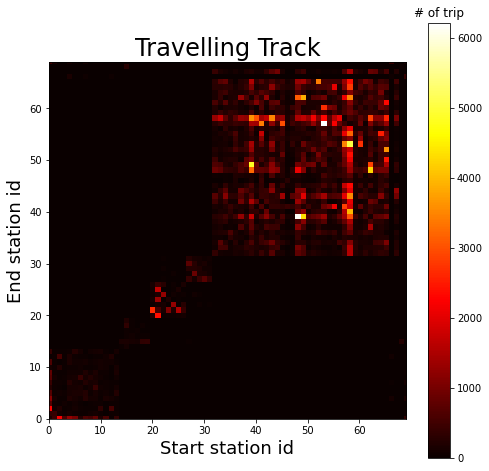

In [136]:
plt.figure(figsize=(8, 8))
plt.title("Travelling Track", fontsize=24)
plt.imshow(geo, cmap='hot')
plt.xlabel("Start station id", fontsize=18)
plt.ylabel("End station id", fontsize=18)
plt.axis([0, 69, 0, 69])
plt.colorbar().ax.set_title('# of trip', rotation=0, fontsize=12)
plt.show()
#  cmap: https://blog.csdn.net/missyougoon/article/details/89510188

In [156]:
station = pd.read_csv("./bikeshare/station.csv")
station

id                               name        lat        long  dock_count  \
0    2  San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
1    3              San Jose Civic Center  37.330698 -121.888979          15   
2    4             Santa Clara at Almaden  37.333988 -121.894902          11   
3    5                   Adobe on Almaden  37.331415 -121.893200          19   
4    6                   San Pedro Square  37.336721 -121.894074          15   
..  ..                                ...        ...         ...         ...   
65  77                  Market at Sansome  37.789625 -122.400811          27   
66  80    Santa Clara County Civic Center  37.352601 -121.905733          15   
67  82          Broadway St at Battery St  37.798541 -122.400862          15   
68  83                         Mezes Park  37.491269 -122.236234          15   
69  84                        Ryland Park  37.342725 -121.895617          15   

             city installation_date  
0        San Jose          8/6/2013  
1        San Jose          8/5/2013  
2        San Jose          8/6/2013  
3        San Jose          8/5/2013  
4        San Jose          8/7/2013  
..            ...               ...  
65  San Francisco         8/25/2013  
66       San Jose        12/31/2013  
67  San Francisco         1/22/2014  
68   Redwood City         2/20/2014  
69       San Jose          4/9/2014  

[70 rows x 7 columns]

In [162]:
city_dict = {'San Jose':0, 'Redwood City':1, 'Mountain View':2, 'Palo Alto':3, 'San Francisco':4}
station['city'] = station['city'].apply(lambda x: city_dict[x])
station

id                               name        lat        long  dock_count  \
0    2  San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
1    3              San Jose Civic Center  37.330698 -121.888979          15   
2    4             Santa Clara at Almaden  37.333988 -121.894902          11   
3    5                   Adobe on Almaden  37.331415 -121.893200          19   
4    6                   San Pedro Square  37.336721 -121.894074          15   
..  ..                                ...        ...         ...         ...   
65  77                  Market at Sansome  37.789625 -122.400811          27   
66  80    Santa Clara County Civic Center  37.352601 -121.905733          15   
67  82          Broadway St at Battery St  37.798541 -122.400862          15   
68  83                         Mezes Park  37.491269 -122.236234          15   
69  84                        Ryland Park  37.342725 -121.895617          15   

    city installation_date  
0      0          8/6/2013  
1      0          8/5/2013  
2      0          8/6/2013  
3      0          8/5/2013  
4      0          8/7/2013  
..   ...               ...  
65     4         8/25/2013  
66     0        12/31/2013  
67     4         1/22/2014  
68     1         2/20/2014  
69     0          4/9/2014  

[70 rows x 7 columns]

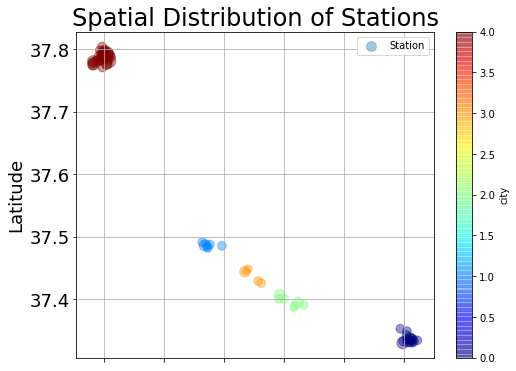

In [454]:
station.plot(kind="scatter", x="long", y="lat", alpha=0.4,
          s=station["dock_count"]*5, label="Station",
          c="city", cmap=plt.get_cmap("jet"),
          colorbar=True, figsize=(8,6), fontsize=18)
plt.title("Spatial Distribution of Stations", fontsize=24)
plt.xlabel("Longitude", fontsize=18)
plt.ylabel("Latitude", fontsize=18)
plt.grid()
plt.legend()

In [350]:
mapa = folium.Map(location=(37.56, -122.2), zoom_start=10, height="100%", width="100%") # , tiles="Stamen Toner": 黑白
loc_li = list(zip(list(station.lat), (station.long))) # <--- change data size
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa

In [455]:
mapa2 = folium.Map(location=(37.56, -122.2), zoom_start=10, height="100%", width="100%", tiles="Stamen Toner") # , tiles="Stamen Toner": 黑白
loc_li = list(zip(list(station.lat), (station.long))) # <--- change data size
HeatMap(loc_li, radius=15).add_to(mapa2) # <-----------------------change radius
for index,row in station.iterrows():
    folium.Marker([float(row['lat']),float(row['long'])], popup=row['name'], radius=2).add_to(mapa2)
mapa2

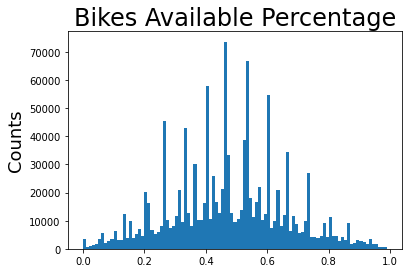

In [420]:
plt.figure(figsize=(6, 4))
plt.title("Bikes Available Percentage", fontsize=24)
plt.xlabel("", fontsize=18)
plt.ylabel("Counts", fontsize=18)
plt.hist(data.bikes_available_percentage, bins= np.arange(0, 1, 0.01))
# plt.xlim(xmin=0.0, xmax = 2000)
plt.show()

### Feature Engineering

In [333]:
data

time  hour  station_id  bikes_available  docks_available  \
0        2013/08/29    13         2.0         2.698113        24.301887   
1        2013/08/29    14         2.0         2.000000        25.000000   
2        2013/08/29    15         2.0         2.000000        25.000000   
3        2013/08/29    16         2.0         2.000000        25.000000   
4        2013/08/29    17         2.0         2.907407        24.092593   
...             ...   ...         ...              ...              ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000   
1204760  2015/08/31    20        84.0         8.000000         7.000000   
1204761  2015/08/31    21        84.0         8.000000         7.000000   
1204762  2015/08/31    22        84.0         8.000000         7.000000   
1204763  2015/08/31    23        84.0         8.000000         7.000000   

        city_zip month dayofweek  dock_count  max_temperature_f  ...  \
0          95113     8         3          27               81.0  ...   
1          95113     8         3          27               81.0  ...   
2          95113     8         3          27               81.0  ...   
3          95113     8         3          27               81.0  ...   
4          95113     8         3          27               81.0  ...   
...          ...   ...       ...         ...                ...  ...   
1204759    95113     8         0          15               85.0  ...   
1204760    95113     8         0          15               85.0  ...   
1204761    95113     8         0          15               85.0  ...   
1204762    95113     8         0          15               85.0  ...   
1204763    95113     8         0          15               85.0  ...   

         mean_wind_speed_mph  max_gust_speed_mph  precipitation_inches  \
0                        7.0                24.0                   0.0   
1                        7.0                24.0                   0.0   
2                        7.0                24.0                   0.0   
3                        7.0                24.0                   0.0   
4                        7.0                24.0                   0.0   
...                      ...                 ...                   ...   
1204759                  6.0                24.0                   0.0   
1204760                  6.0                24.0                   0.0   
1204761                  6.0                24.0                   0.0   
1204762                  6.0                24.0                   0.0   
1204763                  6.0                24.0                   0.0   

         cloud_cover  events  wind_dir_degrees  association_station  year  \
0                4.0       0             320.0             0.074074  2013   
1                4.0       0             320.0             0.099930  2013   
2                4.0       0             320.0             0.074074  2013   
3                4.0       0             320.0             0.074074  2013   
4                4.0       0             320.0             0.074074  2013   
...              ...     ...               ...                  ...   ...   
1204759          1.0       0             308.0             0.572469  2015   
1204760          1.0       0             308.0             0.554321  2015   
1204761          1.0       0             308.0             0.555556  2015   
1204762          1.0       0             308.0             0.555556  2015   
1204763          1.0       0             308.0             0.555556  2015   

         bikes_available_percentage  Rush_hour  
0                          0.099930          1  
1                          0.074074          1  
2                          0.074074          1  
3                          0.074074          1  
4                          0.107682          1  
...                             ...        ...  
1204759                    0.533333          0  
1204760                    0.533333        

Holidays

In [388]:
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start='2013/08/28', end='2015/09/01')
hlist = []
for h in np.datetime_as_string(holidays, unit='D'):
    hlist.append(h.replace('-', '/'))
data['isHoliday'] = data['time'].isin(hlist).astype(np.int)
data

time  hour  station_id  bikes_available  docks_available  \
0        2013/08/29    13         2.0         2.698113        24.301887   
1        2013/08/29    14         2.0         2.000000        25.000000   
2        2013/08/29    15         2.0         2.000000        25.000000   
3        2013/08/29    16         2.0         2.000000        25.000000   
4        2013/08/29    17         2.0         2.907407        24.092593   
...             ...   ...         ...              ...              ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000   
1204760  2015/08/31    20        84.0         8.000000         7.000000   
1204761  2015/08/31    21        84.0         8.000000         7.000000   
1204762  2015/08/31    22        84.0         8.000000         7.000000   
1204763  2015/08/31    23        84.0         8.000000         7.000000   

        city_zip month dayofweek  dock_count  max_temperature_f  ...  \
0          95113     8         3          27               81.0  ...   
1          95113     8         3          27               81.0  ...   
2          95113     8         3          27               81.0  ...   
3          95113     8         3          27               81.0  ...   
4          95113     8         3          27               81.0  ...   
...          ...   ...       ...         ...                ...  ...   
1204759    95113     8         0          15               85.0  ...   
1204760    95113     8         0          15               85.0  ...   
1204761    95113     8         0          15               85.0  ...   
1204762    95113     8         0          15               85.0  ...   
1204763    95113     8         0          15               85.0  ...   

         precipitation_inches  cloud_cover  events  wind_dir_degrees  \
0                         0.0          4.0       0             320.0   
1                         0.0          4.0       0             320.0   
2                         0.0          4.0       0             320.0   
3                         0.0          4.0       0             320.0   
4                         0.0          4.0       0             320.0   
...                       ...          ...     ...               ...   
1204759                   0.0          1.0       0             308.0   
1204760                   0.0          1.0       0             308.0   
1204761                   0.0          1.0       0             308.0   
1204762                   0.0          1.0       0             308.0   
1204763                   0.0          1.0       0             308.0   

         association_station  year  bikes_available_percentage  Rush_hour  \
0                   0.074074  2013                    0.099930          0   
1                   0.099930  2013                    0.074074          0   
2                   0.074074  2013                    0.074074          0   
3                   0.074074  2013                    0.074074          1   
4                   0.074074  2013                    0.107682          1   
...                      ...   ...                         ...        ...   
1204759             0.572469  2015                    0.533333          0   
1204760             0.554321  2015                    0.533333          0   
1204761             0.555556  2015                    0.533333          0   
1204762             0.555556  2015                    0.533333          0   
1204763             0.555556  2015                    0.533333          0   

         isWeekdays  isHoliday  
0                 1          0  
1                 1          0  
2                 1          0  
3                 1          0  
4                 1          0  
...             ...        ...  
1204759           1          0  
1204760           1          0  
1204761           1          0  
1204762           1          0  
1204763           1          0  

[1204764 rows x 37 columns]

In [387]:
hlist = []
for h in np.datetime_as_string(holidays, unit='D'):
    hlist.append(h.replace('-', '/'))
hlist

['2013/09/02',
 '2013/10/14',
 '2013/11/11',
 '2013/11/28',
 '2013/12/25',
 '2014/01/01',
 '2014/01/20',
 '2014/02/17',
 '2014/05/26',
 '2014/07/04',
 '2014/09/01',
 '2014/10/13',
 '2014/11/11',
 '2014/11/27',
 '2014/12/25',
 '2015/01/01',
 '2015/01/19',
 '2015/02/16',
 '2015/05/25',
 '2015/07/03']

In [390]:
data[data['isHoliday'] == 1]

time  hour  station_id  bikes_available  docks_available  \
83       2013/09/02     0         2.0        11.290909        15.709091   
84       2013/09/02     1         2.0        11.423077        15.576923   
85       2013/09/02     2         2.0        11.269231        15.730769   
86       2013/09/02     3         2.0        11.431373        15.568627   
87       2013/09/02     4         2.0        11.365385        15.634615   
...             ...   ...         ...              ...              ...   
1203344  2015/07/03    19        84.0         8.000000         7.000000   
1203345  2015/07/03    20        84.0         7.700000         7.300000   
1203346  2015/07/03    21        84.0         8.000000         7.000000   
1203347  2015/07/03    22        84.0         8.000000         7.000000   
1203348  2015/07/03    23        84.0         8.000000         7.000000   

        city_zip month dayofweek  dock_count  max_temperature_f  ...  \
83         95113     9         0          27               79.0  ...   
84         95113     9         0          27               79.0  ...   
85         95113     9         0          27               79.0  ...   
86         95113     9         0          27               79.0  ...   
87         95113     9         0          27               79.0  ...   
...          ...   ...       ...         ...                ...  ...   
1203344    95113     7         4          15               81.0  ...   
1203345    95113     7         4          15               81.0  ...   
1203346    95113     7         4          15               81.0  ...   
1203347    95113     7         4          15               81.0  ...   
1203348    95113     7         4          15               81.0  ...   

         precipitation_inches  cloud_cover  events  wind_dir_degrees  \
83                        0.0          5.0       1             315.0   
84                        0.0          5.0       1             315.0   
85                        0.0          5.0       1             315.0   
86                        0.0          5.0       1             315.0   
87                        0.0          5.0       1             315.0   
...                       ...          ...     ...               ...   
1203344                   0.0          2.0       0             294.0   
1203345                   0.0          2.0       0             294.0   
1203346                   0.0          2.0       0             294.0   
1203347                   0.0          2.0       0             294.0   
1203348                   0.0          2.0       0             294.0   

         association_station  year  bikes_available_percentage  Rush_hour  \
83                  0.422963  2013                    0.418182          0   
84                  0.418182  2013                    0.423077          0   
85                  0.423077  2013                    0.417379          0   
86                  0.417379  2013                    0.423384          0   
87                  0.423384  2013                    0.420940          0   
...                      ...   ...                         ...        ...   
1203344             0.465062  2015                    0.533333          0   
1203345             0.469136  2015                    0.513333          0   
1203346             0.473374  2015                    0.533333          0   
1203347             0.481481  2015                    0.533333          0   
1203348             0.481481  2015                    0.533333          0   

         isWeekdays  isHoliday  
83                1          1  
84                1          1  
85                1          1  
86                1          1  
87                1          1  
...             ...        ...  
1203344           1          1  
1203345           1          1  
1203346           1          1  
1203347           1          1  
1203348           1          1  

[32688 rows x 37 columns]

WeekDays

In [391]:
data['isWeekdays'] = ''
data.isWeekdays = data.dayofweek.apply(lambda x: 1 if (x < 5) else 0)
data

time  hour  station_id  bikes_available  docks_available  \
0        2013/08/29    13         2.0         2.698113        24.301887   
1        2013/08/29    14         2.0         2.000000        25.000000   
2        2013/08/29    15         2.0         2.000000        25.000000   
3        2013/08/29    16         2.0         2.000000        25.000000   
4        2013/08/29    17         2.0         2.907407        24.092593   
...             ...   ...         ...              ...              ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000   
1204760  2015/08/31    20        84.0         8.000000         7.000000   
1204761  2015/08/31    21        84.0         8.000000         7.000000   
1204762  2015/08/31    22        84.0         8.000000         7.000000   
1204763  2015/08/31    23        84.0         8.000000         7.000000   

        city_zip month dayofweek  dock_count  max_temperature_f  ...  \
0          95113     8         3          27               81.0  ...   
1          95113     8         3          27               81.0  ...   
2          95113     8         3          27               81.0  ...   
3          95113     8         3          27               81.0  ...   
4          95113     8         3          27               81.0  ...   
...          ...   ...       ...         ...                ...  ...   
1204759    95113     8         0          15               85.0  ...   
1204760    95113     8         0          15               85.0  ...   
1204761    95113     8         0          15               85.0  ...   
1204762    95113     8         0          15               85.0  ...   
1204763    95113     8         0          15               85.0  ...   

         precipitation_inches  cloud_cover  events  wind_dir_degrees  \
0                         0.0          4.0       0             320.0   
1                         0.0          4.0       0             320.0   
2                         0.0          4.0       0             320.0   
3                         0.0          4.0       0             320.0   
4                         0.0          4.0       0             320.0   
...                       ...          ...     ...               ...   
1204759                   0.0          1.0       0             308.0   
1204760                   0.0          1.0       0             308.0   
1204761                   0.0          1.0       0             308.0   
1204762                   0.0          1.0       0             308.0   
1204763                   0.0          1.0       0             308.0   

         association_station  year  bikes_available_percentage  Rush_hour  \
0                   0.074074  2013                    0.099930          0   
1                   0.099930  2013                    0.074074          0   
2                   0.074074  2013                    0.074074          0   
3                   0.074074  2013                    0.074074          1   
4                   0.074074  2013                    0.107682          1   
...                      ...   ...                         ...        ...   
1204759             0.572469  2015                    0.533333          0   
1204760             0.554321  2015                    0.533333          0   
1204761             0.555556  2015                    0.533333          0   
1204762             0.555556  2015                    0.533333          0   
1204763             0.555556  2015                    0.533333          0   

         isWeekdays  isHoliday  
0                 1          0  
1                 1          0  
2                 1          0  
3                 1          0  
4                 1          0  
...             ...        ...  
1204759           1          0  
1204760           1          0  
1204761           1          0  
1204762           1          0  
1204763           1          0  

[1204764 rows x 37 columns]

Rush hour

In [392]:
data['Rush_hour'] = ''
data.Rush_hour = data.apply(lambda x: 1 if ((x.isWeekdays == 1 and x.isHoliday == 0 and x.hour >= 7 and x.hour <= 9)
                                        or (x.isWeekdays == 1 and x.isHoliday == 0 and x.hour >= 16 and x.hour <= 18)
                                        or (x.isWeekdays == 1 and x.isHoliday == 1 and x.hour >= 11 and x.hour <= 16)
                                        or (x.isWeekdays == 0 and x.hour >= 11 and x.hour <= 16))
                                       else 0, axis=1)
data

time  hour  station_id  bikes_available  docks_available  \
0        2013/08/29    13         2.0         2.698113        24.301887   
1        2013/08/29    14         2.0         2.000000        25.000000   
2        2013/08/29    15         2.0         2.000000        25.000000   
3        2013/08/29    16         2.0         2.000000        25.000000   
4        2013/08/29    17         2.0         2.907407        24.092593   
...             ...   ...         ...              ...              ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000   
1204760  2015/08/31    20        84.0         8.000000         7.000000   
1204761  2015/08/31    21        84.0         8.000000         7.000000   
1204762  2015/08/31    22        84.0         8.000000         7.000000   
1204763  2015/08/31    23        84.0         8.000000         7.000000   

        city_zip month dayofweek  dock_count  max_temperature_f  ...  \
0          95113     8         3          27               81.0  ...   
1          95113     8         3          27               81.0  ...   
2          95113     8         3          27               81.0  ...   
3          95113     8         3          27               81.0  ...   
4          95113     8         3          27               81.0  ...   
...          ...   ...       ...         ...                ...  ...   
1204759    95113     8         0          15               85.0  ...   
1204760    95113     8         0          15               85.0  ...   
1204761    95113     8         0          15               85.0  ...   
1204762    95113     8         0          15               85.0  ...   
1204763    95113     8         0          15               85.0  ...   

         precipitation_inches  cloud_cover  events  wind_dir_degrees  \
0                         0.0          4.0       0             320.0   
1                         0.0          4.0       0             320.0   
2                         0.0          4.0       0             320.0   
3                         0.0          4.0       0             320.0   
4                         0.0          4.0       0             320.0   
...                       ...          ...     ...               ...   
1204759                   0.0          1.0       0             308.0   
1204760                   0.0          1.0       0             308.0   
1204761                   0.0          1.0       0             308.0   
1204762                   0.0          1.0       0             308.0   
1204763                   0.0          1.0       0             308.0   

         association_station  year  bikes_available_percentage  Rush_hour  \
0                   0.074074  2013                    0.099930          0   
1                   0.099930  2013                    0.074074          0   
2                   0.074074  2013                    0.074074          0   
3                   0.074074  2013                    0.074074          1   
4                   0.074074  2013                    0.107682          1   
...                      ...   ...                         ...        ...   
1204759             0.572469  2015                    0.533333          0   
1204760             0.554321  2015                    0.533333          0   
1204761             0.555556  2015                    0.533333          0   
1204762             0.555556  2015                    0.533333          0   
1204763             0.555556  2015                    0.533333          0   

         isWeekdays  isHoliday  
0                 1          0  
1                 1          0  
2                 1          0  
3                 1          0  
4                 1          0  
...             ...        ...  
1204759           1          0  
1204760           1          0  
1204761           1          0  
1204762           1          0  
1204763           1          0  

[1204764 rows x 37 columns]

In [343]:
data.apply(lambda x: 1 if ((x.isWeekdays == 1 and x.hour >= 7 and x.hour <= 9)
                        or (x.isWeekdays == 1 and x.hour >= 16 and x.hour <= 18)
                        or (x.isWeekdays == 0 and x.hour >= 11 and x.hour <= 16))
                       else 0, axis=1)

0          0
1          0
2          0
3          1
4          1
          ..
1204759    0
1204760    0
1204761    0
1204762    0
1204763    0
Length: 1204764, dtype: int64

In [394]:
data = data.astype({'month': object, 'dayofweek': object, 'city_zip': object, 'Rush_hour': object, 'isWeekdays': object, 'isHoliday': object})
data

time  hour  station_id  bikes_available  docks_available  \
0        2013/08/29    13         2.0         2.698113        24.301887   
1        2013/08/29    14         2.0         2.000000        25.000000   
2        2013/08/29    15         2.0         2.000000        25.000000   
3        2013/08/29    16         2.0         2.000000        25.000000   
4        2013/08/29    17         2.0         2.907407        24.092593   
...             ...   ...         ...              ...              ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000   
1204760  2015/08/31    20        84.0         8.000000         7.000000   
1204761  2015/08/31    21        84.0         8.000000         7.000000   
1204762  2015/08/31    22        84.0         8.000000         7.000000   
1204763  2015/08/31    23        84.0         8.000000         7.000000   

        city_zip month dayofweek  dock_count  max_temperature_f  ...  \
0          95113     8         3          27               81.0  ...   
1          95113     8         3          27               81.0  ...   
2          95113     8         3          27               81.0  ...   
3          95113     8         3          27               81.0  ...   
4          95113     8         3          27               81.0  ...   
...          ...   ...       ...         ...                ...  ...   
1204759    95113     8         0          15               85.0  ...   
1204760    95113     8         0          15               85.0  ...   
1204761    95113     8         0          15               85.0  ...   
1204762    95113     8         0          15               85.0  ...   
1204763    95113     8         0          15               85.0  ...   

         precipitation_inches  cloud_cover  events  wind_dir_degrees  \
0                         0.0          4.0       0             320.0   
1                         0.0          4.0       0             320.0   
2                         0.0          4.0       0             320.0   
3                         0.0          4.0       0             320.0   
4                         0.0          4.0       0             320.0   
...                       ...          ...     ...               ...   
1204759                   0.0          1.0       0             308.0   
1204760                   0.0          1.0       0             308.0   
1204761                   0.0          1.0       0             308.0   
1204762                   0.0          1.0       0             308.0   
1204763                   0.0          1.0       0             308.0   

         association_station  year  bikes_available_percentage  Rush_hour  \
0                   0.074074  2013                    0.099930          0   
1                   0.099930  2013                    0.074074          0   
2                   0.074074  2013                    0.074074          0   
3                   0.074074  2013                    0.074074          1   
4                   0.074074  2013                    0.107682          1   
...                      ...   ...                         ...        ...   
1204759             0.572469  2015                    0.533333          0   
1204760             0.554321  2015                    0.533333          0   
1204761             0.555556  2015                    0.533333          0   
1204762             0.555556  2015                    0.533333          0   
1204763             0.555556  2015                    0.533333          0   

         isWeekdays  isHoliday  
0                 1          0  
1                 1          0  
2                 1          0  
3                 1          0  
4                 1          0  
...             ...        ...  
1204759           1          0  
1204760           1          0  
1204761           1          0  
1204762           1          0  
1204763           1          0  

[1204764 rows x 37 columns]

In [395]:
data.describe(include=[object])

time   city_zip      month  dayofweek     year  Rush_hour  \
count      1204764  1204764.0  1204764.0  1204764.0  1204764    1204764   
unique         733        5.0       12.0        7.0        3          2   
top     2014/11/30    94107.0        8.0        0.0     2014          0   
freq          1680   609702.0   107890.0   173213.0   605819     903642   

        isWeekdays  isHoliday  
count      1204764    1204764  
unique           2          2  
top              1          0  
freq        860724    1172076

In [396]:
pd.get_dummies(data.loc[:, ['city_zip', 'month', 'dayofweek']], drop_first=True)

city_zip_94063.0  city_zip_94107.0  city_zip_94301.0  \
0                       0                 0                 0   
1                       0                 0                 0   
2                       0                 0                 0   
3                       0                 0                 0   
4                       0                 0                 0   
...                   ...               ...               ...   
1204759                 0                 0                 0   
1204760                 0                 0                 0   
1204761                 0                 0                 0   
1204762                 0                 0                 0   
1204763                 0                 0                 0   

         city_zip_95113.0  month_2.0  month_3.0  month_4.0  month_5.0  \
0                       1          0          0          0          0   
1                       1          0          0          0          0   
2                       1          0          0          0          0   
3                       1          0          0          0          0   
4                       1          0          0          0          0   
...                   ...        ...        ...        ...        ...   
1204759                 1          0          0          0          0   
1204760                 1          0          0          0          0   
1204761                 1          0          0          0          0   
1204762                 1          0          0          0          0   
1204763                 1          0          0          0          0   

         month_6.0  month_7.0  ...  month_9.0  month_10.0  month_11.0  \
0                0          0  ...          0           0           0   
1                0          0  ...          0           0           0   
2                0          0  ...          0           0           0   
3                0          0  ...          0           0           0   
4                0          0  ...          0           0           0   
...            ...        ...  ...        ...         ...         ...   
1204759          0          0  ...          0           0           0   
1204760          0          0  ...          0           0           0   
1204761          0          0  ...          0           0           0   
1204762          0          0  ...          0           0           0   
1204763          0          0  ...          0           0           0   

         month_12.0  dayofweek_1.0  dayofweek_2.0  dayofweek_3.0  \
0                 0              0              0              1   
1                 0              0              0              1   
2                 0              0              0              1   
3                 0              0              0              1   
4                 0              0              0              1   
...             ...            ...            ...            ...   
1204759           0              0              0              0   
1204760           0              0              0              0   
1204761           0              0              0              0   
1204762           0              0              0              0   
1204763           0              0              0              0   

         dayofweek_4.0  dayofweek_5.0  dayofweek_6.0  
0                    0              0              0  
1                    0              0              0  
2                    0              0              0  
3                    0              0              0  
4                    0              0              0  
...                ...            ...            ...  
1204759              0              0              0  
1204760              0              0              0  
1204761              0              0              0  
1204762              0              0              0  
1204763              0              0              0

In [397]:
data_process = data.join(pd.get_dummies(data.loc[:, ['city_zip', 'month', 'dayofweek']], drop_first=True)).drop(['city_zip', 'dayofweek'], axis=1)
data_process

time  hour  station_id  bikes_available  docks_available month  \
0        2013/08/29    13         2.0         2.698113        24.301887     8   
1        2013/08/29    14         2.0         2.000000        25.000000     8   
2        2013/08/29    15         2.0         2.000000        25.000000     8   
3        2013/08/29    16         2.0         2.000000        25.000000     8   
4        2013/08/29    17         2.0         2.907407        24.092593     8   
...             ...   ...         ...              ...              ...   ...   
1204759  2015/08/31    19        84.0         8.000000         7.000000     8   
1204760  2015/08/31    20        84.0         8.000000         7.000000     8   
1204761  2015/08/31    21        84.0         8.000000         7.000000     8   
1204762  2015/08/31    22        84.0         8.000000         7.000000     8   
1204763  2015/08/31    23        84.0         8.000000         7.000000     8   

         dock_count  max_temperature_f  mean_temperature_f  min_temperature_f  \
0                27               81.0                72.0               63.0   
1                27               81.0                72.0               63.0   
2                27               81.0                72.0               63.0   
3                27               81.0                72.0               63.0   
4                27               81.0                72.0               63.0   
...             ...                ...                 ...                ...   
1204759          15               85.0                72.0               59.0   
1204760          15               85.0                72.0               59.0   
1204761          15               85.0                72.0               59.0   
1204762          15               85.0                72.0               59.0   
1204763          15               85.0                72.0               59.0   

         ...  month_9.0  month_10.0  month_11.0  month_12.0  dayofweek_1.0  \
0        ...          0           0           0           0              0   
1        ...          0           0           0           0              0   
2        ...          0           0           0           0              0   
3        ...          0           0           0           0              0   
4        ...          0           0           0           0              0   
...      ...        ...         ...         ...         ...            ...   
1204759  ...          0           0           0           0              0   
1204760  ...          0           0           0           0              0   
1204761  ...          0           0           0           0              0   
1204762  ...          0           0           0           0              0   
1204763  ...          0           0           0           0              0   

         dayofweek_2.0  dayofweek_3.0  dayofweek_4.0  dayofweek_5.0  \
0                    0              1              0              0   
1                    0              1              0              0   
2                    0              1              0              0   
3                    0              1              0              0   
4                    0              1              0              0   
...                ...            ...            ...            ...   
1204759              0              0              0              0   
1204760              0              0              0              0   
1204761              0              0              0              0   
1204762              0              0              0              0   
1204763              0              0              0              0   

         dayofweek_6.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1204759              0  
1204760              0  
1204761              0  
1204762              0  
1204

In [399]:
data_process.columns

Index(['time', 'hour', 'station_id', 'bikes_available', 'docks_available',
       'month', 'dock_count', 'max_temperature_f', 'mean_temperature_f',
       'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f',
       'min_dew_point_f', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_inches',
       'cloud_cover', 'events', 'wind_dir_degrees', 'association_station',
       'year', 'bikes_available_percentage', 'Rush_hour', 'isWeekdays',
       'isHoliday', 'city_zip_94063.0', 'city_zip_94107.0', 'city_zip_94301.0',
       'city_zip_95113.0', 'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0',
       'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0', 'month_10.0',
       'month_11.0', 'month_12.0', 'day

In [409]:
cols = ['time', 'year', 'month', 'hour', 'station_id', 'events', 'Rush_hour', 'isWeekdays', 
        'city_zip_94063.0', 'city_zip_94107.0', 'city_zip_94301.0', 'city_zip_95113.0', 
        'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 
        'month_8.0', 'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0', 'bikes_available', 
        'docks_available', 'dock_count', 'max_temperature_f', 'mean_temperature_f', 
        'min_temperature_f', 'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f', 
        'max_humidity', 'mean_humidity', 'min_humidity', 'max_sea_level_pressure_inches', 
        'mean_sea_level_pressure_inches', 'min_sea_level_pressure_inches', 
        'max_visibility_miles', 'mean_visibility_miles', 'min_visibility_miles', 
        'max_wind_Speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph', 
        'precipitation_inches', 'cloud_cover', 'wind_dir_degrees', 'association_station',
        'bikes_available_percentage']

In [410]:
data_process[cols]

time  year month  hour  station_id  events Rush_hour  \
0        2013/08/29  2013     8    13         2.0       0         0   
1        2013/08/29  2013     8    14         2.0       0         0   
2        2013/08/29  2013     8    15         2.0       0         0   
3        2013/08/29  2013     8    16         2.0       0         1   
4        2013/08/29  2013     8    17         2.0       0         1   
...             ...   ...   ...   ...         ...     ...       ...   
1204759  2015/08/31  2015     8    19        84.0       0         0   
1204760  2015/08/31  2015     8    20        84.0       0         0   
1204761  2015/08/31  2015     8    21        84.0       0         0   
1204762  2015/08/31  2015     8    22        84.0       0         0   
1204763  2015/08/31  2015     8    23        84.0       0         0   

        isWeekdays  city_zip_94063.0  city_zip_94107.0  ...  \
0                1                 0                 0  ...   
1                1                 0                 0  ...   
2                1                 0                 0  ...   
3                1                 0                 0  ...   
4                1                 0                 0  ...   
...            ...               ...               ...  ...   
1204759          1                 0                 0  ...   
1204760          1                 0                 0  ...   
1204761          1                 0                 0  ...   
1204762          1                 0                 0  ...   
1204763          1                 0                 0  ...   

         mean_visibility_miles  min_visibility_miles  max_wind_Speed_mph  \
0                         10.0                  10.0                16.0   
1                         10.0                  10.0                16.0   
2                         10.0                  10.0                16.0   
3                         10.0                  10.0                16.0   
4                         10.0                  10.0                16.0   
...                        ...                   ...                 ...   
1204759                   10.0                  10.0                20.0   
1204760                   10.0                  10.0                20.0   
1204761                   10.0                  10.0                20.0   
1204762                   10.0                  10.0                20.0   
1204763                   10.0                  10.0                20.0   

         mean_wind_speed_mph  max_gust_speed_mph  precipitation_inches  \
0                        7.0                24.0                   0.0   
1                        7.0                24.0                   0.0   
2                        7.0                24.0                   0.0   
3                        7.0                24.0                   0.0   
4                        7.0                24.0                   0.0   
...                      ...                 ...                   ...   
1204759                  6.0                24.0                   0.0   
1204760                  6.0                24.0                   0.0   
1204761                  6.0                24.0                   0.0   
1204762                  6.0                24.0                   0.0   
1204763                  6.0                24.0                   0.0   

         cloud_cover  wind_dir_degrees  association_station  \
0                4.0             320.0             0.074074   
1                4.0             320.0             0.099930   
2                4.0             320.0             0.074074   
3                4.0             320.0             0.074074   
4                4.0             320.0             0.074074   
...              ...               ...                  ...   
1204759          1.0             308.0             0.572469   
1204760          1.0             308.0             0.554321   
1204761          1.0             308

In [411]:
trainset = pd.DataFrame()
testset = pd.DataFrame()
for i in data_process.station_id.unique():
    si = data_process.loc[data_process.station_id == i, cols]
    test_head = si[(si.year == '2015') & (si.month == 6)].index.values[0]
    trainset = trainset.append(si.loc[:(test_head-1), :])
    testset = testset.append(si.loc[test_head:, :])
print("done.")

done.


In [271]:
# si = data_process[data_process.station_id == 3]
# si[(si.year == '2015') & (si.month == 6)].index.values[0]

32853

In [273]:
# si.loc[:32853, :]

time  hour  station_id  bikes_available  docks_available month  \
17527  2013/08/29    12         3.0         8.083333         6.916667     8   
17528  2013/08/29    13         3.0         9.000000         6.000000     8   
17529  2013/08/29    14         3.0         9.000000         6.000000     8   
17530  2013/08/29    15         3.0         9.000000         6.000000     8   
17531  2013/08/29    16         3.0         9.381818         5.618182     8   
...           ...   ...         ...              ...              ...   ...   
32849  2015/05/31    20         3.0         9.900000         5.100000     5   
32850  2015/05/31    21         3.0        10.000000         5.000000     5   
32851  2015/05/31    22         3.0         9.833333         5.166667     5   
32852  2015/05/31    23         3.0        10.000000         5.000000     5   
32853  2015/06/01     0         3.0         9.916667         5.083333     6   

       dock_count  max_temperature_f  mean_temperature_f  min_temperature_f  \
17527          15               81.0                72.0               63.0   
17528          15               81.0                72.0               63.0   
17529          15               81.0                72.0               63.0   
17530          15               81.0                72.0               63.0   
17531          15               81.0                72.0               63.0   
...           ...                ...                 ...                ...   
32849          15               69.0                63.0               57.0   
32850          15               69.0                63.0               57.0   
32851          15               69.0                63.0               57.0   
32852          15               69.0                63.0               57.0   
32853          15               75.0                65.0               54.0   

       ...  month_9.0  month_10.0  month_11.0  month_12.0  dayofweek_1.0  \
17527  ...          0           0           0           0              0   
17528  ...          0           0           0           0              0   
17529  ...          0           0           0           0              0   
17530  ...          0           0           0           0              0   
17531  ...          0           0           0           0              0   
...    ...        ...         ...         ...         ...            ...   
32849  ...          0           0           0           0              0   
32850  ...          0           0           0           0              0   
32851  ...          0           0           0           0              0   
32852  ...          0           0           0           0              0   
32853  ...          0           0           0           0              0   

       dayofweek_2.0  dayofweek_3.0  dayofweek_4.0  dayofweek_5.0  \
17527              0              1              0              0   
17528              0              1              0              0   
17529              0              1              0              0   
17530              0              1              0              0   
17531              0              1              0              0   
...              ...            ...            ...            ...   
32849              0              0              0              0   
32850              0              0              0              0   
32851              0              0              0              0   
32852              0              0              0              0   
32853              0              0              0              0   

       dayofweek_6.0  
17527              0  
17528              0  
17529              0  
17530              0  
17531              0  
...              ...  
32849              1  
32850              1  
32851              1  
32852              1  
32853              0  

[15327 rows x 53 columns]

In [412]:
trainset

time  year month  hour  station_id  events Rush_hour  \
0        2013/08/29  2013     8    13         2.0       0         0   
1        2013/08/29  2013     8    14         2.0       0         0   
2        2013/08/29  2013     8    15         2.0       0         0   
3        2013/08/29  2013     8    16         2.0       0         1   
4        2013/08/29  2013     8    17         2.0       0         1   
...             ...   ...   ...   ...         ...     ...       ...   
1202555  2015/05/31  2015     5    19        84.0       0         0   
1202556  2015/05/31  2015     5    20        84.0       0         0   
1202557  2015/05/31  2015     5    21        84.0       0         0   
1202558  2015/05/31  2015     5    22        84.0       0         0   
1202559  2015/05/31  2015     5    23        84.0       0         0   

        isWeekdays  city_zip_94063.0  city_zip_94107.0  ...  \
0                1                 0                 0  ...   
1                1                 0                 0  ...   
2                1                 0                 0  ...   
3                1                 0                 0  ...   
4                1                 0                 0  ...   
...            ...               ...               ...  ...   
1202555          0                 0                 0  ...   
1202556          0                 0                 0  ...   
1202557          0                 0                 0  ...   
1202558          0                 0                 0  ...   
1202559          0                 0                 0  ...   

         mean_visibility_miles  min_visibility_miles  max_wind_Speed_mph  \
0                         10.0                  10.0                16.0   
1                         10.0                  10.0                16.0   
2                         10.0                  10.0                16.0   
3                         10.0                  10.0                16.0   
4                         10.0                  10.0                16.0   
...                        ...                   ...                 ...   
1202555                   10.0                   7.0                17.0   
1202556                   10.0                   7.0                17.0   
1202557                   10.0                   7.0                17.0   
1202558                   10.0                   7.0                17.0   
1202559                   10.0                   7.0                17.0   

         mean_wind_speed_mph  max_gust_speed_mph  precipitation_inches  \
0                        7.0                24.0                   0.0   
1                        7.0                24.0                   0.0   
2                        7.0                24.0                   0.0   
3                        7.0                24.0                   0.0   
4                        7.0                24.0                   0.0   
...                      ...                 ...                   ...   
1202555                  7.0                22.0                   0.0   
1202556                  7.0                22.0                   0.0   
1202557                  7.0                22.0                   0.0   
1202558                  7.0                22.0                   0.0   
1202559                  7.0                22.0                   0.0   

         cloud_cover  wind_dir_degrees  association_station  \
0                4.0             320.0             0.074074   
1                4.0             320.0             0.099930   
2                4.0             320.0             0.074074   
3                4.0             320.0             0.074074   
4                4.0             320.0             0.074074   
...              ...               ...                  ...   
1202555          6.0             311.0             0.388683   
1202556          6.0             311.0             0.394033   
1202557          6.0             311

In [413]:
trainset = trainset.reset_index().drop("index", axis=1)
trainset

time  year month  hour  station_id  events Rush_hour  \
0        2013/08/29  2013     8    13         2.0       0         0   
1        2013/08/29  2013     8    14         2.0       0         0   
2        2013/08/29  2013     8    15         2.0       0         0   
3        2013/08/29  2013     8    16         2.0       0         1   
4        2013/08/29  2013     8    17         2.0       0         1   
...             ...   ...   ...   ...         ...     ...       ...   
1050538  2015/05/31  2015     5    19        84.0       0         0   
1050539  2015/05/31  2015     5    20        84.0       0         0   
1050540  2015/05/31  2015     5    21        84.0       0         0   
1050541  2015/05/31  2015     5    22        84.0       0         0   
1050542  2015/05/31  2015     5    23        84.0       0         0   

        isWeekdays  city_zip_94063.0  city_zip_94107.0  ...  \
0                1                 0                 0  ...   
1                1                 0                 0  ...   
2                1                 0                 0  ...   
3                1                 0                 0  ...   
4                1                 0                 0  ...   
...            ...               ...               ...  ...   
1050538          0                 0                 0  ...   
1050539          0                 0                 0  ...   
1050540          0                 0                 0  ...   
1050541          0                 0                 0  ...   
1050542          0                 0                 0  ...   

         mean_visibility_miles  min_visibility_miles  max_wind_Speed_mph  \
0                         10.0                  10.0                16.0   
1                         10.0                  10.0                16.0   
2                         10.0                  10.0                16.0   
3                         10.0                  10.0                16.0   
4                         10.0                  10.0                16.0   
...                        ...                   ...                 ...   
1050538                   10.0                   7.0                17.0   
1050539                   10.0                   7.0                17.0   
1050540                   10.0                   7.0                17.0   
1050541                   10.0                   7.0                17.0   
1050542                   10.0                   7.0                17.0   

         mean_wind_speed_mph  max_gust_speed_mph  precipitation_inches  \
0                        7.0                24.0                   0.0   
1                        7.0                24.0                   0.0   
2                        7.0                24.0                   0.0   
3                        7.0                24.0                   0.0   
4                        7.0                24.0                   0.0   
...                      ...                 ...                   ...   
1050538                  7.0                22.0                   0.0   
1050539                  7.0                22.0                   0.0   
1050540                  7.0                22.0                   0.0   
1050541                  7.0                22.0                   0.0   
1050542                  7.0                22.0                   0.0   

         cloud_cover  wind_dir_degrees  association_station  \
0                4.0             320.0             0.074074   
1                4.0             320.0             0.099930   
2                4.0             320.0             0.074074   
3                4.0             320.0             0.074074   
4                4.0             320.0             0.074074   
...              ...               ...                  ...   
1050538          6.0             311.0             0.388683   
1050539          6.0             311.0             0.394033   
1050540          6.0             311

In [414]:
testset = testset.reset_index().drop("index", axis=1)
testset

time  year month  hour  station_id  events Rush_hour isWeekdays  \
0       2015/06/01  2015     6     0         2.0       0         0          1   
1       2015/06/01  2015     6     1         2.0       0         0          1   
2       2015/06/01  2015     6     2         2.0       0         0          1   
3       2015/06/01  2015     6     3         2.0       0         0          1   
4       2015/06/01  2015     6     4         2.0       0         0          1   
...            ...   ...   ...   ...         ...     ...       ...        ...   
154216  2015/08/31  2015     8    19        84.0       0         0          1   
154217  2015/08/31  2015     8    20        84.0       0         0          1   
154218  2015/08/31  2015     8    21        84.0       0         0          1   
154219  2015/08/31  2015     8    22        84.0       0         0          1   
154220  2015/08/31  2015     8    23        84.0       0         0          1   

        city_zip_94063.0  city_zip_94107.0  ...  mean_visibility_miles  \
0                      0                 0  ...                   10.0   
1                      0                 0  ...                   10.0   
2                      0                 0  ...                   10.0   
3                      0                 0  ...                   10.0   
4                      0                 0  ...                   10.0   
...                  ...               ...  ...                    ...   
154216                 0                 0  ...                   10.0   
154217                 0                 0  ...                   10.0   
154218                 0                 0  ...                   10.0   
154219                 0                 0  ...                   10.0   
154220                 0                 0  ...                   10.0   

        min_visibility_miles  max_wind_Speed_mph  mean_wind_speed_mph  \
0                       10.0                18.0                 10.0   
1                       10.0                18.0                 10.0   
2                       10.0                18.0                 10.0   
3                       10.0                18.0                 10.0   
4                       10.0                18.0                 10.0   
...                      ...                 ...                  ...   
154216                  10.0                20.0                  6.0   
154217                  10.0                20.0                  6.0   
154218                  10.0                20.0                  6.0   
154219                  10.0                20.0                  6.0   
154220                  10.0                20.0                  6.0   

        max_gust_speed_mph  precipitation_inches  cloud_cover  \
0                     23.0                   0.0          5.0   
1                     23.0                   0.0          5.0   
2                     23.0                   0.0          5.0   
3                     23.0                   0.0          5.0   
4                     23.0                   0.0          5.0   
...                    ...                   ...          ...   
154216                24.0                   0.0          1.0   
154217                24.0                   0.0          1.0   
154218                24.0                   0.0          1.0   
154219                24.0                   0.0          1.0   
154220                24.0                   0.0          1.0   

        wind_dir_degrees  association_station  bikes_available_percentage  
0                  320.0             0.392181                    0.503086  
1                  320.0             0.389918                    0.493827  
2                  320.0             0.386831                    0.506173  
3                  320.0             0.390947                    0.502469  
4                  320.0             0.389712                    0.503086  
...                  ...              

In [415]:
testset.columns

Index(['time', 'year', 'month', 'hour', 'station_id', 'events', 'Rush_hour',
       'isWeekdays', 'city_zip_94063.0', 'city_zip_94107.0',
       'city_zip_94301.0', 'city_zip_95113.0', 'month_2.0', 'month_3.0',
       'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0',
       'bikes_available', 'docks_available', 'dock_count', 'max_temperature_f',
       'mean_temperature_f', 'min_temperature_f', 'max_dew_point_f',
       'mean_dew_point_f', 'min_dew_point_f', 'max_humidity', 'mean_humidity',
       'min_humidity', 'max_sea_level_pressure_inches',
       'mean_sea_level_pressure_inches', 'min_sea_level_pressure_inches',
       'max_visibility_miles', 'mean_visibility_miles', 'min_visibility_miles',
       'max_wind_Speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_inches', 'cloud_cover', 'wind_dir_degrees',
       'association_station', 'bikes_available_percentage'],
      dtype='obj

In [456]:
trainset.bikes_available_percentage.mean(), trainset.bikes_available_percentage.std()

(0.47688020396926445, 0.18781248022591931)

In [416]:
trainset.to_csv("./bikeshare/bikeshare_train.csv")
testset.to_csv("./bikeshare/bikeshare_test.csv")